In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()

import feature_extractor



In [3]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import pickle


/cluster/scratch/bdayan/GIRG_data/socfb-Berkeley13.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-American75.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UConn.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MSU24.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Virginia63.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Duke14.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Indiana69.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UChicago30.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster

In [4]:
## NB numpy version was 1.19.5. Was not working so upgraded to 1.20.0
import grakel

In [5]:
np.__version__

'1.24.4'

In [6]:
import importlib
importlib.reload(mcmc)

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

In [17]:
from benji_girgs import graph_kernels
import importlib
importlib.reload(graph_kernels)

<module 'benji_girgs.graph_kernels' from '../benji_girgs/graph_kernels.py'>

In [18]:
points_type=points.PointsTorus2
c_implementation=True

n=1500
tau=2.5
alpha=5.0
desiredAvgDegree=40.0

def gen_girg(d):
    g, edges, weights, pts, const = generation.generate_GIRG_nk(
        n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points_type, c_implementation=c_implementation)
    return g

g = gen_girg(1)
g = utils.get_largest_component(g)
g_gk = graph_kernels.g_to_grakel(g, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, num_colors=None))

nk.overview(g)
# kernel = grakel.WeisfeilerLehman(n_iter=5, normalize=True)
# kernel.fit_transform([g_gk])

Network Properties:
nodes, edges			1500, 29971
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026659
clustering coefficient		0.796456
min/max/avg degree		5, 1109, 39.961333
degree assortativity		-0.166110
number of connected components	1
size of largest component	1500 (100.00 %)


In [22]:
edge_labelling_func = lambda g: {e: 1 for e in g.iterEdges()}
node_labelling_func = lambda g: graph_kernels.graph_to_labels(g, metric='betweenness', num_colors=10)

g_gk = graph_kernels.g_to_grakel(g, node_labelling_func=node_labelling_func, edge_labelling_func=edge_labelling_func)

NameError: name 'g' is not defined

Network Properties:
nodes, edges			1500, 22326
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019859
clustering coefficient		0.741959
min/max/avg degree		4, 1022, 29.768000
degree assortativity		-0.160485
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.9769977135261554
0.9770434347372762
0.9770494519368674
0.9770428776007831
0.9770133494244911
0.97701272146287
0.9769949494238495
0.9769922554323739
1
0.9767147694686942
0.9767417964858209
0.9768518262809552
0.9768666178201074
0.9765989135070191
0.9768484300463919
0.9768935122892412
0.9767739855813474
2
0.9769410090736111
0.9769924651803026
0.9769410090736111
0.9769648652593378
0.9770007569620797
0.9769761998983022
0.9770035213135554
0.9770243380126639
3
0.9770093293871952
0.9770575388908919
0.977048477690557
0.9770360252344108
0.9770420429314419
0.977032842568144
0.9770573999237538
0.9770663224013837


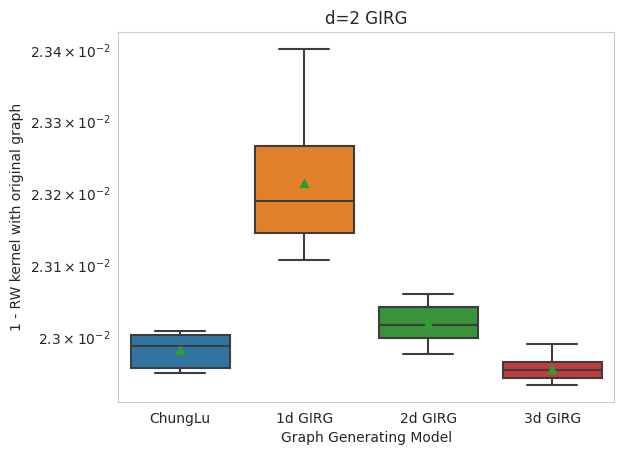

In [8]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=1500, tau=2.5, alpha=5.0, desiredAvgDegree=30.0,
    kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
    #  kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=8, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='betweenness', num_colors=7), plot_type='swarmplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			1500, 22454
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019972
clustering coefficient		0.783477
min/max/avg degree		5, 1204, 29.938667
degree assortativity		-0.116816
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.9769257402061156
0.9769047858176275
0.9769170285475199
0.9769228362483567
0.9769108723190796
0.9769319660839032
0.9769020217118675
0.9769107328539299
1
0.9765804064149444
0.9766017024945357
0.9766520658523362
0.9768513374638599
0.97666437822823
0.9767292554806619
0.9766554647390631
0.9767683163498327
2
0.9768604666880923
0.9769142643373209
0.9769090160725827
0.9768629496127308
0.9768453915492551
0.9769198626616867
0.9769137761231822
0.9768900584176098
3
0.9769436521153684
0.9769616342547831
0.9769286442354377
0.9769316875510069
0.9769405392140298
0.9769377741821452
0.9769404001239593
0.9769466954587288


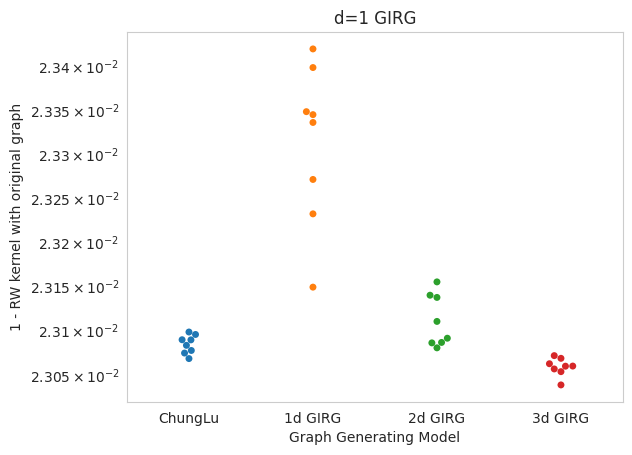

In [14]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=1500, tau=2.5, alpha=5.0, desiredAvgDegree=30.0,
    kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
    #  kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=8, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='betweenness', num_colors=7), plot_type='swarmplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			1500, 22454
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019972
clustering coefficient		0.792995
min/max/avg degree		4, 995, 29.938667
degree assortativity		-0.128250
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.036430440615569104
0.036442555492426254
0.03641040426710951
0.03642487095022762
0.036409971061419744
0.03642454580226717
1
0.03665390658301637
0.03666514230056683
0.03658941703567298
0.03701222762699752
0.03671739880426106
0.03694468071113477
2
0.03641854257221411
0.03655602369651623
0.03640226501494859
0.03647448737677628
0.03646559139927408
0.03645166880930972
3
0.03644588244468072
0.03641072908698029
0.03644866718527051
0.036402048610873705
0.036427980967885465
0.03638125270027748


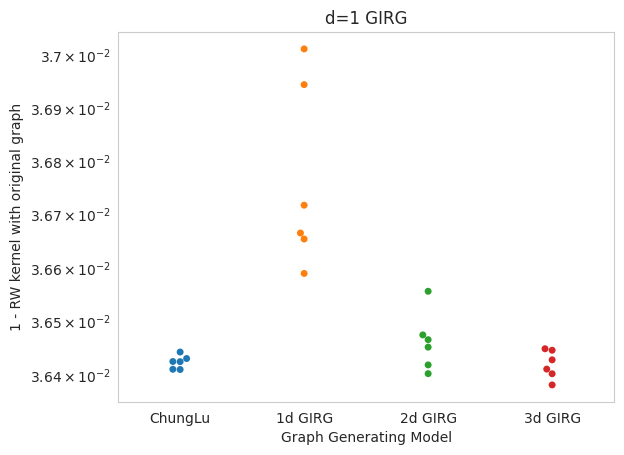

In [32]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=1500, tau=2.5, alpha=5.0, desiredAvgDegree=30.0,
    kernel=grakel.WeisfeilerLehman(n_iter=8, normalize=True, n_jobs=5),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
    #  kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=6, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='betweenness', num_colors=7, power=0.5), plot_type='swarmplot', points_type=points.PointsTorus2)

In [ ]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=1500, tau=2.5, alpha=5.0, desiredAvgDegree=30.0,
    kernel=grakel.WeisfeilerLehman(n_iter=8, normalize=True, n_jobs=5),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
    #  kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=6, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='betweenness', num_colors=7, power=0.5), plot_type='swarmplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			1500, 22320
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019853
clustering coefficient		0.730693
min/max/avg degree		3, 1314, 29.760000
degree assortativity		-0.124213
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.03616765607155781
0.03613849795773283
0.0361383896725721
0.03614985804638182


Network Properties:
nodes, edges			1500, 22428
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019949
clustering coefficient		0.721761
min/max/avg degree		3, 652, 29.904000
degree assortativity		-0.124714
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.9820852299501368
0.9812033503352948
0.9842968202461231
0.9830672057456796
0.9838915771222991
0.9845691279318624
0.9811210818688167
0.9842609379399383
1
0.9854701446443278
0.9835015218317427
0.9794450774665638
0.9841222539222942
0.9840139353550855
0.9824118288841189
0.9824801890150411
0.9812489815534853
2
0.9864797378372259
0.9842410276052832
0.9824006668472751
0.9826691388222585
0.9856818373677755
0.9827158293443495
0.982946232406341
0.9809860254141199
3
0.9845039713709587
0.9856298330159888
0.9809104796947543
0.9804407487529506
0.9867211641352359
0.9855818396081687
0.9847270958782292
0.9848037735914447


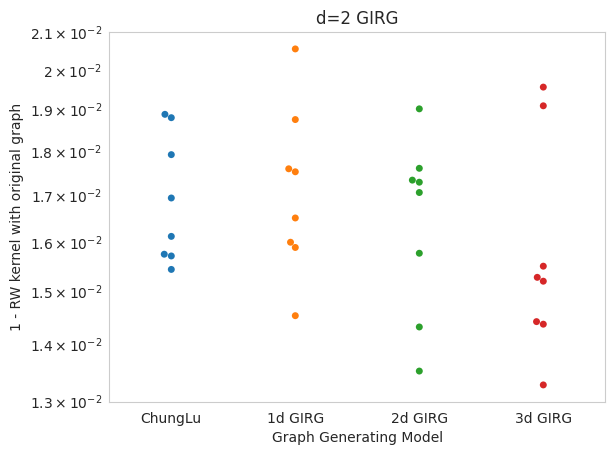

In [13]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=1500, tau=2.5, alpha=5.0, desiredAvgDegree=30.0,
    kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
    #  kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=8, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='degrees', num_colors=4), plot_type='swarmplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			1500, 22260
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019800
clustering coefficient		0.743172
min/max/avg degree		3, 1413, 29.680000
degree assortativity		-0.134615
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.9678439602437434
0.9537696014852566
0.9495916983980535
0.9648695168629178
0.9566423018860365
1
0.956892489969702
0.9701969288801826
0.9619413381633715
0.9655805614789198
0.9680599936165639
2
0.9755389618251066
0.9715077343541151
0.9747136429444415
0.9600624967825502
0.9690703928725781
3
0.9635287276070243
0.9579408164274058
0.9714775514209506
0.9754740624090823
0.963931667780935


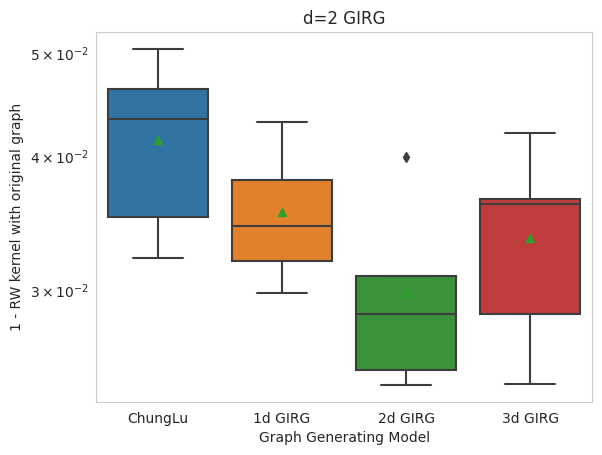

In [10]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=1500, tau=2.5, alpha=5.0, desiredAvgDegree=30.0,
    kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
    #  kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=5, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='degrees', num_colors=7), plot_type='boxplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			1500, 22487
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.020002
clustering coefficient		0.720075
min/max/avg degree		3, 700, 29.982667
degree assortativity		-0.116110
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.9755362087846029
0.9766514970225093
0.9734281700459856
0.9722934966631179
0.9741666171057621
0.9732186428570746
0.9769749895157922
0.9751444150181587
1
0.9612498832743452
0.9718515152111562
0.9716407942048566
0.9759779042294043
0.9718235988381155
0.9594011251647736
0.9743377223884382
0.9717732681134361
2
0.9740354565155251
0.9755303012799089
0.9589225454024713
0.9713928844499236
0.9621390357970202
0.9659369066010868
0.9521628212384874
0.9668559181444559
3
0.9680668508568542
0.963158052469087
0.9517566156818048
0.9618949504519303
0.9633645278543014
0.9684077311292805
0.9737485290847897
0.9730817740823732


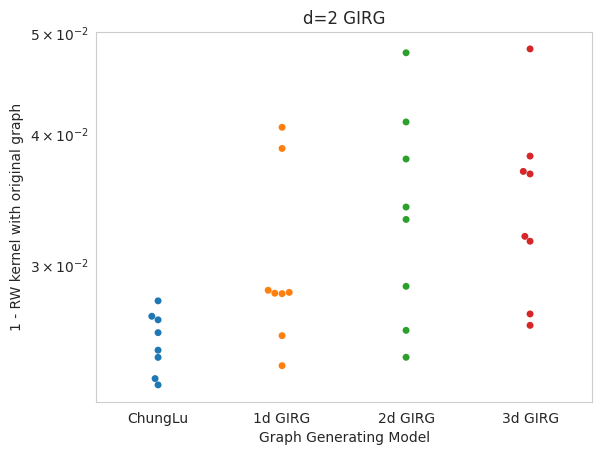

In [12]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=1500, tau=2.5, alpha=5.0, desiredAvgDegree=30.0,
    kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
    #  kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=8, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='degrees', num_colors=7), plot_type='swarmplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			400, 4010
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.050251
clustering coefficient		0.780664
min/max/avg degree		2, 263, 20.050000
degree assortativity		-0.128404
number of connected components	1
size of largest component	400 (100.00 %)
cl
0.999998681766051
0.9999988544724171
0.9999986280062806
0.9999989380276539
1
0.9999973843770338
0.9999911836481962
0.9999983838683751
0.9999992142272917
2
0.9999962588095633
0.9999946581225134
0.9999963589315124
0.9999937449893389
3
0.9999970898675666
0.9999982627926887
0.999996935341663
0.9999983061863151


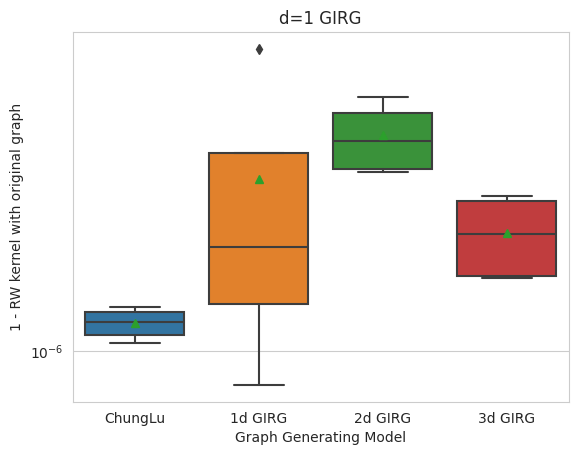

In [34]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=400, tau=2.5, alpha=5.0, desiredAvgDegree=20.0,
    # kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
     kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=4, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='betweenness', num_colors=7), plot_type='boxplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			400, 3944
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.049424
clustering coefficient		0.584857
min/max/avg degree		2, 194, 19.720000
degree assortativity		-0.104090
number of connected components	1
size of largest component	400 (100.00 %)
cl
0.9999986305636985
0.999999411873222
0.9999993471639554
0.9999995134900472
1
0.9999981546987973
0.9999985582987079
0.9999984385470216
0.9999925274045944
2
0.9999980363335526
0.9999980422729177
0.9999986217698255
0.999997132056381
3
0.9999989996061895
0.9999996543944739
0.9999993261831851
0.9999994046972023


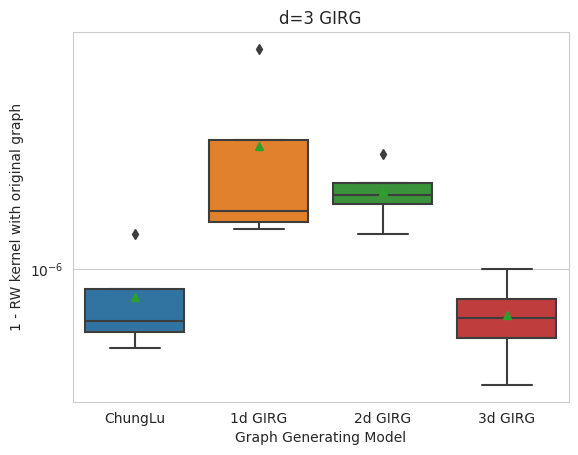

In [35]:
data, info = graph_kernels.multiple_girg_comparisons(d=3, n=400, tau=2.5, alpha=5.0, desiredAvgDegree=20.0,
    # kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
     kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=4, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='betweenness', num_colors=7), plot_type='boxplot', points_type=points.PointsTorus2)

In [37]:
info

{'n': 400,
 'tau': 2.5,
 'alpha': 5.0,
 'desiredAvgDegree': 20.0,
 'd': 3,
 'kernel': RandomWalkLabeled(lamda=1e-05, n_jobs=5, normalize=True),
 'points_type': benji_girgs.points.PointsTorus2,
 'c_implementation': True}

Network Properties:
nodes, edges			400, 4010
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.050251
clustering coefficient		0.784039
min/max/avg degree		5, 392, 20.050000
degree assortativity		-0.139443
number of connected components	1
size of largest component	400 (100.00 %)
cl
0.9999990333167098
0.9999992039449023
0.9999992013633885
0.9999993949231255
1
0.9999994549561273
0.9999979323451071
0.9999981515125704
0.9999987780998647
2
0.9999957073956222
0.9999986322942546
0.9999992517681513
0.9999968526152304
3
0.9999992071736327
0.9999990459312337
0.9999990008873627
0.9999986195432994


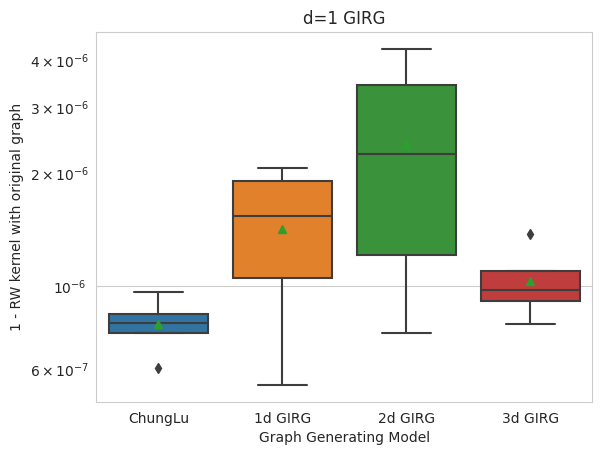

In [23]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=400, tau=2.5, alpha=5.0, desiredAvgDegree=20.0,
    # kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
     kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=5),
    n_per=4, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='betweenness', num_colors=7), plot_type='boxplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			400, 4070
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.051003
clustering coefficient		0.741481
min/max/avg degree		3, 399, 20.350000
degree assortativity		-0.189496
number of connected components	1
size of largest component	400 (100.00 %)
cl
0.9999988000831483
0.999998556779111
0.9999982610457903
0.9999986481744313
1
0.9999993616437852
0.9999988239323818
0.9999925292768598
0.9999922738770572
2
0.9999986697462795
0.9999989727434871
0.9999991590262086
0.9999981519535031
3
0.9999990831386355
0.9999980367616483
0.9999994722835828
0.9999991294976167


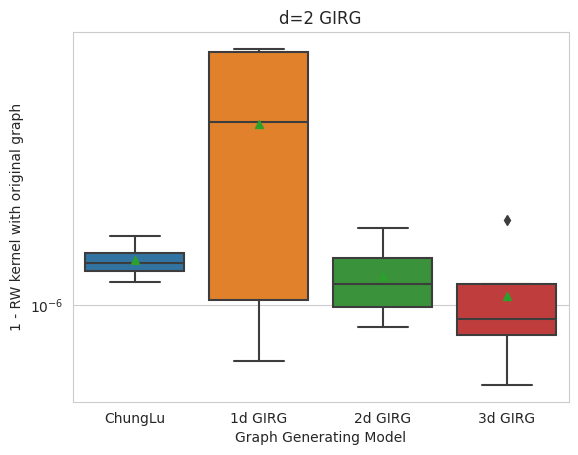

In [25]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=400, tau=2.5, alpha=5.0, desiredAvgDegree=20.0,
    # kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
     kernel = grakel.RandomWalkLabeled(normalize=True, lamda=1e-5, kernel_type='geometric', n_jobs=10),
    n_per=4, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, metric='betweenness', num_colors=7), plot_type='boxplot', points_type=points.PointsTorus2)

In [8]:
os.getcwd()

'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [9]:
folder = '/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness'
import glob
fns = glob.glob(folder + '/*.pkl')
fns[0]

'/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=1 n=100 alpha=5.0 num_colors=7 n_per=8.pkl'

In [13]:
fns

['/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=1 n=100 alpha=5.0 num_colors=7 n_per=8.pkl',
 '/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=2 n=100 alpha=5.0 num_colors=7 n_per=8.pkl',
 '/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=3 n=100 alpha=5.0 num_colors=7 n_per=8.pkl',
 '/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=4 n=100 alpha=5.0 num_colors=7 n_per=8.pkl',
 '/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=1 n=400 alpha=5.0 num_colors=4 n_per=8.pkl',
 '/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=2 n=400 alpha=5.0 num_colors=4 n_per=8.pkl',
 '/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=3 n=400 alpha=5.0 num_colors=4 n_per=8.pkl',
 '/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=4 n=400 alpha=5.0 num_colors=4 n_per=8.pkl',
 '/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=1 n=400 al

In [12]:
import pickle
data = pickle.load(open(fns[0], 'rb'))
fns[0]

'/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=1 n=100 alpha=5.0 num_colors=7 n_per=8.pkl'

/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=1 n=800 alpha=5.0 num_colors=7 n_per=8.pkl


<Figure size 640x480 with 0 Axes>

<AxesSubplot: >

Text(0, 0.5, '1 - RW kernel with original graph')

Text(0.5, 0, 'Graph Generating Model')

Text(0.5, 1.0, 'd=1 GIRG')

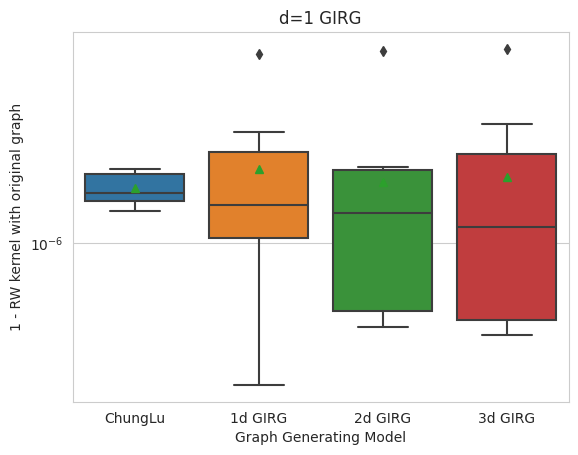

In [29]:
import re
import seaborn as sns

fn = fns[-5]
print(fn)
d = int(re.match('.*d=([0-9]+).*', fn).group(1))
data = pickle.load(open(fn, 'rb'))
plt.figure()
sns.boxplot(data=data, showmeans=True)
plt.yscale('log')
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')
plt.title(f'd={d} GIRG')

/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=2 n=800 alpha=5.0 num_colors=7 n_per=8.pkl


<Figure size 640x480 with 0 Axes>

<AxesSubplot: >

Text(0, 0.5, '1 - RW kernel with original graph')

Text(0.5, 0, 'Graph Generating Model')

Text(0.5, 1.0, 'd=2 GIRG')

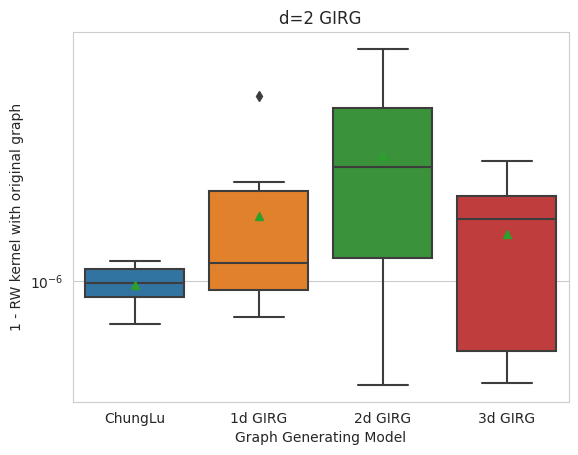

In [32]:
fn = fns[-4]
print(fn)
d = int(re.match('.*d=([0-9]+).*', fn).group(1))
data = pickle.load(open(fn, 'rb'))
plt.figure()
sns.boxplot(data=data, showmeans=True)
plt.yscale('log')
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')
plt.title(f'd={d} GIRG')

/cluster/home/bdayan/girgs/benji_src/gentorus_RW_with_betweenness/d=3 n=800 alpha=5.0 num_colors=7 n_per=8.pkl


<Figure size 640x480 with 0 Axes>

<AxesSubplot: >

Text(0, 0.5, '1 - RW kernel with original graph')

Text(0.5, 0, 'Graph Generating Model')

Text(0.5, 1.0, 'd=3 GIRG')

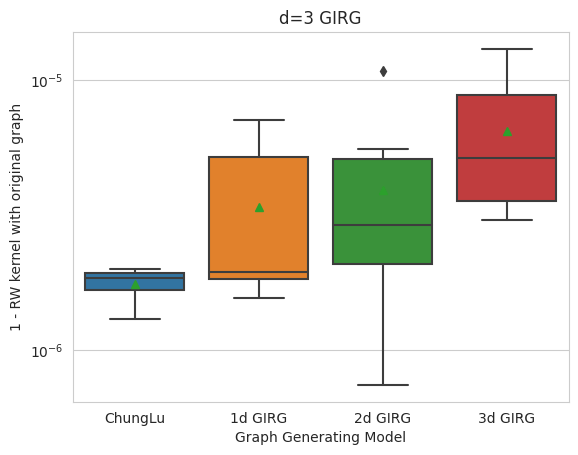

In [33]:
fn = fns[-3]
print(fn)
d = int(re.match('.*d=([0-9]+).*', fn).group(1))
data = pickle.load(open(fn, 'rb'))
plt.figure()
sns.boxplot(data=data, showmeans=True)
plt.yscale('log')
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')
plt.title(f'd={d} GIRG')

In [16]:
t = grakel.Graph({'a': {'b': 2., 'c': 1.}, 'b': {'a': 2.}, 'c': {'a': 1.}})
t2 = grakel.Graph({'a': {'b': 2., 'c': 1.}, 'c': {'a': 1.}})


In [17]:
t.get_edge_dictionary()

{'a': {'b': 2.0, 'c': 1.0}, 'b': {'a': 2.0}, 'c': {'a': 1.0}}

In [18]:
t2.get_edge_dictionary()

{'a': {'b': 2.0, 'c': 1.0}, 'c': {'a': 1.0}, 'b': {}}

In [20]:
t.get_adjacency_matrix()
t2.get_adjacency_matrix()

array([[0., 2., 1.],
       [2., 0., 0.],
       [1., 0., 0.]])

array([[0., 2., 1.],
       [0., 0., 0.],
       [1., 0., 0.]])

Network Properties:
nodes, edges			1000, 19856
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.039752
clustering coefficient		0.790962
min/max/avg degree		6, 999, 39.712000
degree assortativity		-0.158409
number of connected components	1
size of largest component	1000 (100.00 %)


/cluster/home/bdayan/girgs/venvtemp/lib64/python3.8/site-packages/grakel/kernels/graphlet_sampling.py:136: UserWarning: no implemented parallelization for GraphletSampling
  warnings.warn('no implemented parallelization for GraphletSampling')


cl
0.9993795892534045
0.9996595131553321
0.9995222217601554
0.9996099020540006
1
0.9994724005051377
0.9989938309707833
0.9992563614003652
0.9997589883772451
2
0.9992190023292509
0.9997010349768004
0.9995877327110756
0.9996462678048177
3
0.9993048164681549
0.9998041391695273
0.9987773412757271
0.9996570441548203


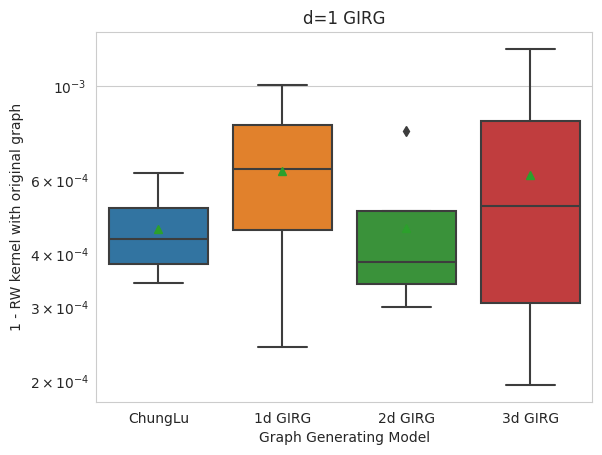

In [14]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=1000, tau=2.5, alpha=5.0, desiredAvgDegree=40.0,
    # kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
     kernel = grakel.GraphletSampling(k=5, sampling=dict(n_samples=10000), normalize=True, n_jobs=5),
    n_per=4, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, num_colors=7), plot_type='boxplot', points_type=points.PointsTorus2)

In [ ]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=500, tau=2.5, alpha=5.0, desiredAvgDegree=30.0,
    # kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True),
    # kernel=grakel.SubgraphMatching(k=5, n_jobs=5),
     kernel = grakel.SubgraphMatching(k=2, ke=None, normalize=True, n_jobs=5),
    n_per=7, node_labelling_func=lambda g: graph_kernels.graph_to_labels(g, num_colors=10),
    edge_labelling_func=edge_labelling_func,
                                                     plot_type='boxplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			500, 7543
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.060465
clustering coefficient		0.719029
min/max/avg degree		6, 490, 30.172000
degree assortativity		-0.159455
number of connected components	1
size of largest component	500 (100.00 %)
cl
0.9780138901907945


Network Properties:
nodes, edges			2000, 40129
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.020075
clustering coefficient		0.801075
min/max/avg degree		7, 1656, 40.129000
degree assortativity		-0.163309
number of connected components	1
size of largest component	2000 (100.00 %)
cl
0.9867648694950112
0.9846204289159469
0.9862033239565697
0.9849704985721116
0.9867348926715346
0.9859211014847004
0.9847870198641349
0.9847985644339079
0.9867728403565437
0.984949592482933
0.9866680168485544
1
0.9836409852288784
0.9858045713224628
0.9864093173045425
0.9861522158712862
0.9852803962457408
0.98573012119928
0.9865670930026762
0.9855918724839824
0.9866575874721478
0.9871944186171273
0.9859097978145407
2
0.9859805405185841
0.9871880026975548
0.986516455554131
0.9873589788033132
0.9865872194606355
0.9865036502224531
0.9851308525445988
0.9874015390362885
0.9865869452859497
0.9842656897412919
0.9869544976958194
3
0.9865924575244103
0.9863485501900321
0.987303700149

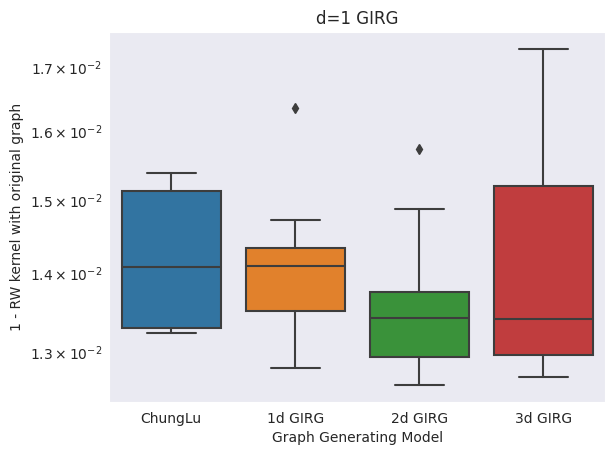

In [12]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=2000, tau=2.5, alpha=5.0, desiredAvgDegree=40.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=11, node_labelling_func=lambda g: graph_to_labels_random(g, num_colors=5), plot_type='boxplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			2000, 39915
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019967
clustering coefficient		0.793723
min/max/avg degree		6, 1432, 39.915000
degree assortativity		-0.144379
number of connected components	1
size of largest component	2000 (100.00 %)
cl
0.986128530970427
0.9859921031852091
0.9869897393906639
0.9872289939653051
0.9869845951634136
0.9845541325261759
0.9872881261559262
0.9874944650134249
0.9811400755144836
0.9837446259903991
0.9841021418329647
1
0.9793809675198366
0.9849712353398742
0.9874526810295621
0.9829788542034779
0.9828479772317171
0.9829773598420571
0.9809292352694723
0.9816165212501852
0.9874358688770051
0.9872763294668523
0.9872569657065043
2
0.9806734756947324
0.9865837890224756
0.9873699572197702
0.986031483140886
0.9797649584974443
0.986900064193834
0.9784823677718982
0.9789609654573358
0.9875445767476535
0.9735157922947333
0.9803799478323963
3
0.9848729031997102
0.9792426190087038
0.98750678670

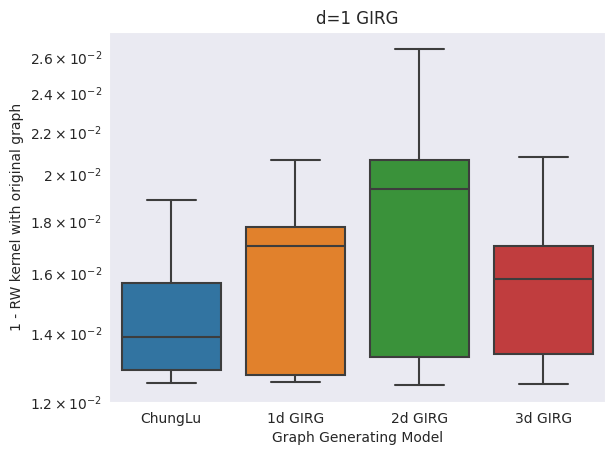

In [13]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=2000, tau=2.5, alpha=5.0, desiredAvgDegree=40.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=11, node_labelling_func=lambda g: graph_to_labels(g, num_colors=5), plot_type='boxplot', points_type=points.PointsTorus2)

Network Properties:
nodes, edges			10000, 199928
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.003999
clustering coefficient		0.803380
min/max/avg degree		3, 6772, 39.985600
degree assortativity		-0.094295
number of connected components	1
size of largest component	10000 (100.00 %)
cl
0.9619699175554365
0.9634276976447143
0.9645059256920087
1
0.9756896199207089
0.9760342672515563
0.9762117881326785
2
0.973817630582468
0.9740509346272916
0.9750031291753113
3
0.9780868188680869
0.9757405226466077
0.9078620002325449


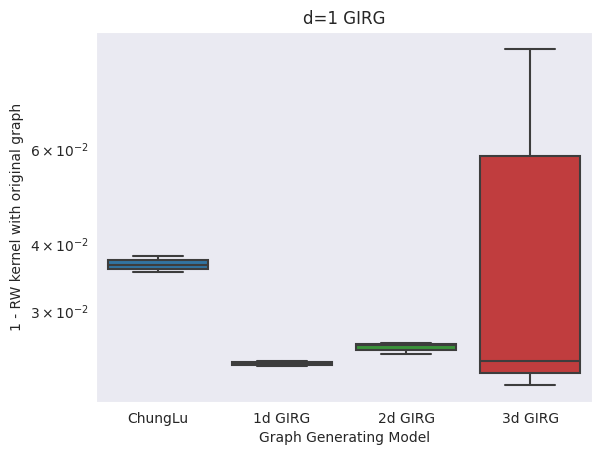

In [16]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=10000, tau=2.5, alpha=5.0, desiredAvgDegree=40.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=3, node_labelling_func=lambda g: graph_to_labels(g, num_colors=None), plot_type='boxplot', points_type=points.PointsTorus2)

In [17]:
data

,ChungLu,1d GIRG,2d GIRG,3d GIRG
0,0.038030,0.024310,0.026182,0.021913
1,0.036572,0.023966,0.025949,0.024259
2,0.035494,0.023788,0.024997,0.092138


<AxesSubplot: >

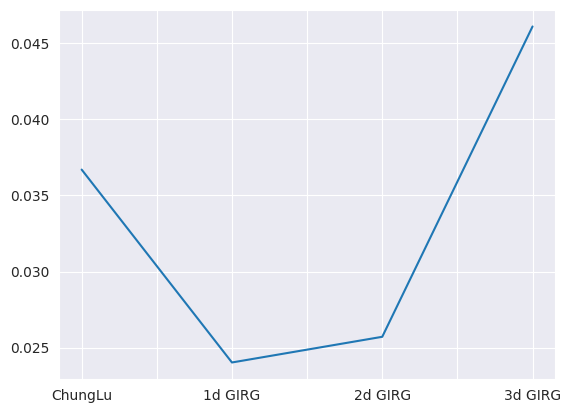

In [19]:
data.mean().plot()

Network Properties:
nodes, edges			10000, 300758
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.006016
clustering coefficient		0.794325
min/max/avg degree		6, 7662, 60.151600
degree assortativity		-0.088987
number of connected components	1
size of largest component	10000 (100.00 %)
cl
0.9594040114878459
0.957842585988809
0.9559628019121199
0.9583433797286763
0.9564474925737407
1
0.9689181256482673
0.964628618525289
0.9667808054511978
0.9671141415906969
0.9668954210579477
2
0.9675816728457289
0.9660728896500197
0.9534309156568376
0.9681003812069565
0.9624293196956198
3
0.9652953355928414
0.9658417570212025
0.9644421113829441
0.9672171206431047
0.9660865441624173


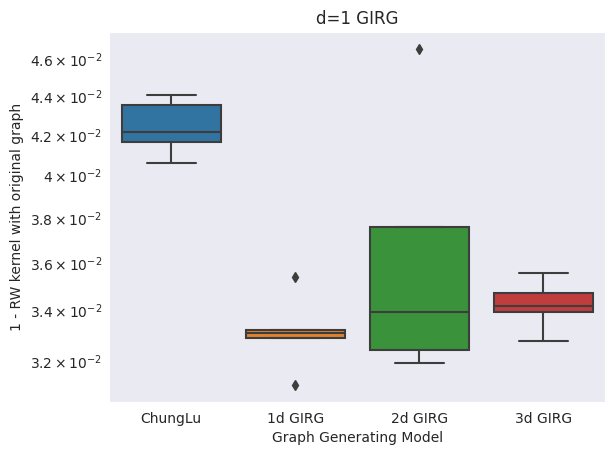

In [20]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=10000, tau=2.5, alpha=5.0, desiredAvgDegree=60.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=5, node_labelling_func=lambda g: graph_to_labels(g, num_colors=None), plot_type='boxplot', points_type=points.PointsTorus2)

In [22]:
data

,ChungLu,1d GIRG,2d GIRG,3d GIRG
0,0.040596,0.031082,0.032418,0.034705
1,0.042157,0.035371,0.033927,0.034158
2,0.044037,0.033219,0.046569,0.035558
3,0.041657,0.032886,0.031900,0.032783
4,0.043553,0.033105,0.037571,0.033913


<AxesSubplot: >

<AxesSubplot: >

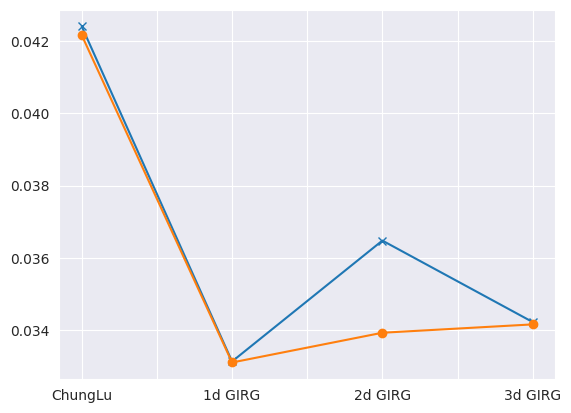

In [25]:
data.mean().plot(marker = 'x')
data.median().plot(marker='o')

Network Properties:
nodes, edges			10000, 299241
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.005985
clustering coefficient		0.710914
min/max/avg degree		8, 3518, 59.848200
degree assortativity		-0.069576
number of connected components	1
size of largest component	10000 (100.00 %)
cl
0.9557614534732597
0.9568952327489104
0.9584043877620855
0.9563005778616513
0.9562110082279678
1
0.9626164458387609
0.9623177714592507
0.9634684721490969
0.9579260982692868
0.9633466182270185
2
0.9594331520067472
0.9650079958140544
0.9646962369599992
0.9626417780132722
0.9647867162364931
3
0.9633429354063092
0.9611311404545513
0.9633863547260616
0.954379267108743
0.947412020507463


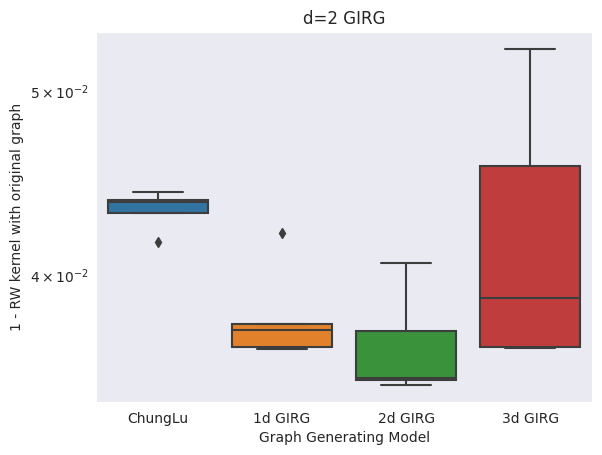

In [26]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=10000, tau=2.5, alpha=5.0, desiredAvgDegree=60.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=5, node_labelling_func=lambda g: graph_to_labels(g, num_colors=None), plot_type='boxplot', points_type=points.PointsTorus2)

<AxesSubplot: >

<AxesSubplot: >

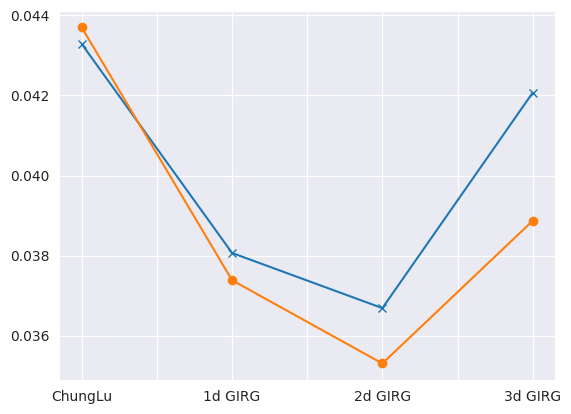

In [27]:
data.mean().plot(marker = 'x')
data.median().plot(marker='o')

Network Properties:
nodes, edges			10000, 300583
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.006012
clustering coefficient		0.641197
min/max/avg degree		9, 7109, 60.116600
degree assortativity		-0.079949
number of connected components	1
size of largest component	10000 (100.00 %)
cl
0.9569665294433659
0.9569089426065864
0.9588173330923517
0.9560153668754948
0.9582124037779919
1
0.9669003375466633
0.9672287199360387
0.9667379658295557
0.9661548307993902
0.9684357145994646
2
0.9677109314727164
0.9664634194645577
0.9663814990592262
0.9688905833316424
0.968479850795829
3
0.9669794129669255
0.9678507248378699
0.9690449925185097
0.9677700192956938
0.9676204502174645


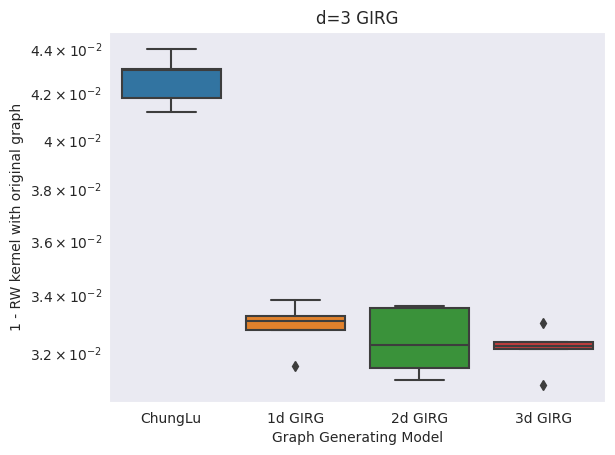

In [28]:
data, info = graph_kernels.multiple_girg_comparisons(d=3, n=10000, tau=2.5, alpha=5.0, desiredAvgDegree=60.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=5, node_labelling_func=lambda g: graph_to_labels(g, num_colors=None), plot_type='boxplot', points_type=points.PointsTorus2)

<AxesSubplot: >

<AxesSubplot: >

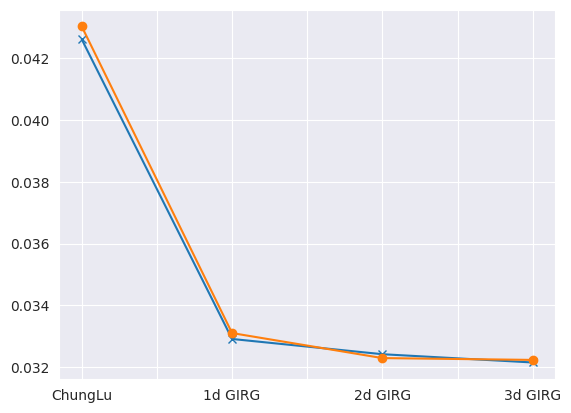

In [29]:
data.mean().plot(marker = 'x')
data.median().plot(marker='o')

In [30]:
from itertools import product
list(product([1,2,3], ['a', 'b']))

[(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b'), (3, 'a'), (3, 'b')]

Network Properties:
nodes, edges			3000, 59888
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.013313
clustering coefficient		0.798283
min/max/avg degree		7, 2388, 39.925333
degree assortativity		-0.139058
number of connected components	1
size of largest component	3000 (100.00 %)
cl
0.32154077974719425
0.4155400335097405
0.4168195298593621
0.40302840124746253
0.41146828195980806
0.41074431674626055
0.44491767717440056
0.43565082361977187
0.39475088050889107
0.42168468603960596
0.40786016649064255
1
0.5424482376091039
0.1857409287957114
0.31458695012545806
0.45188045545198036
0.2928970280583379
0.4461424931596308
0.2110886651511202
0.3253703395787545
0.39628596911008224
0.22359888293817723
0.5425513465461397
2
0.26679569917313245
0.2894930678797763
0.3969403500043636
0.7513564146969786
0.28773373058276114
0.4801592149126215
0.3183795059232316
0.2408157595426123
0.1652703902652108
0.554652956611987
0.19044516751424193
3
0.3120943078521157
0.254721809251

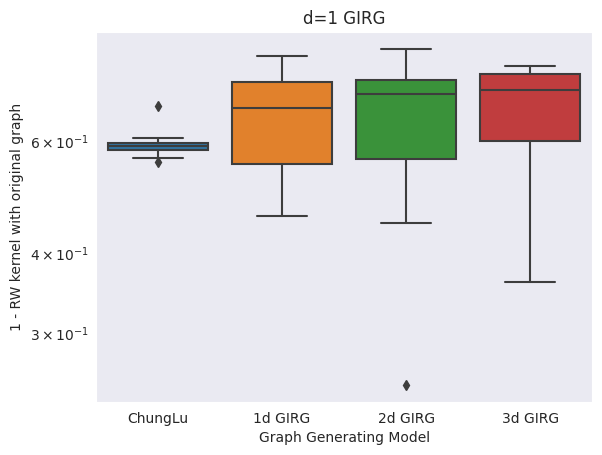

In [25]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=3000, tau=2.5, alpha=5.0, desiredAvgDegree=40.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=11, node_labelling_func=lambda g: graph_to_labels(g, num_colors=100), plot_type='boxplot')

Network Properties:
nodes, edges			1500, 29924
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026617
clustering coefficient		0.756987
min/max/avg degree		6, 1409, 39.898667
degree assortativity		-0.173815
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.3568754653398991
0.4772941919098492
0.4172155854716926
0.3872739523155489
0.38940761283659125
0.3298499976518393
0.43013518194727507
0.4441199174894286
0.39931334563290544
0.29718522818973714
0.3645144403061924
1
0.25348309608481223
0.28167249289287094
0.40324435005181386
0.46703236317285224
0.31323912712149893
0.2957781112171844
0.17901060834982244
0.5881833641018656
0.292755764125858
0.35923034854049307
0.16064511059527056
2
0.5911431588402831
0.2589190874937388
0.1711857911196733
0.6549768758402206
0.5056844152098628
0.5242710707177243
0.3193497465412964
0.281247194900566
0.3307099113529167
0.4014338986524592
0.31097364830198176
3
0.208593564203194
0.15569096654956538

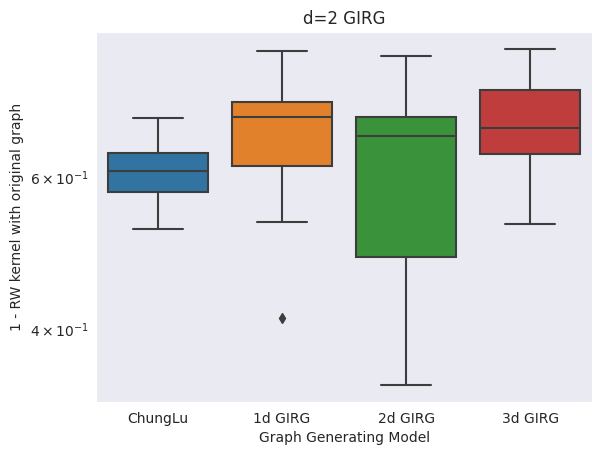

In [26]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=1500, tau=2.5, alpha=5.0, desiredAvgDegree=40.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=11, node_labelling_func=lambda g: graph_to_labels(g, num_colors=100), plot_type='boxplot')

Network Properties:
nodes, edges			1500, 30068
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026745
clustering coefficient		0.539178
min/max/avg degree		8, 1401, 40.090667
degree assortativity		-0.135793
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.9291001213780135
0.9343002616040184
0.9238405789738487
0.9354721444468893
0.8851128139906083
0.9305933212414532
0.9283236677533508
0.9332812458848545
0.9293865201640122
0.9331473204254221
0.9281487815688473
1
0.9186049121432212
0.891325116712883
0.913589200058486
0.9154793622433015
0.897085772718809
0.9191095383544351
0.9173466092034157
0.9125678176363449
0.9085385798851484
0.915498682130532
0.9479450517338486
2
0.9026076024318056
0.9059099685244573
0.9013889508704507
0.9224555660540406
0.904813341927995
0.9162990974531805
0.9153562285787658
0.9315923116614261
0.9173509230058171
0.893458059603189
0.9360728660686369
3
0.8894057302480809
0.9142874522978445
0.89855032631430

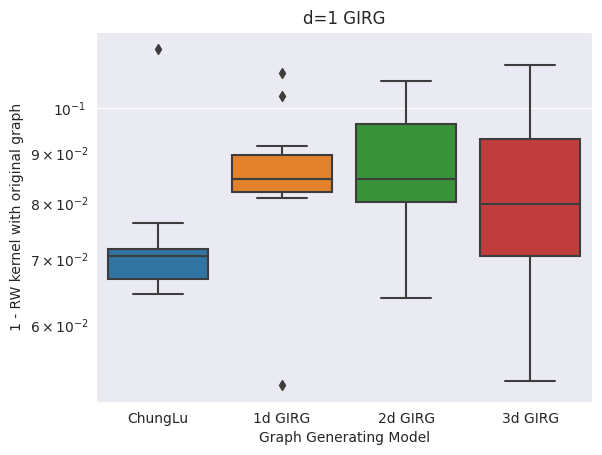

In [16]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=1500, tau=2.5, alpha=1.5, desiredAvgDegree=40.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=11, node_labelling_func=lambda g: graph_to_labels(g, num_colors=15), plot_type='boxplot')

<AxesSubplot: >

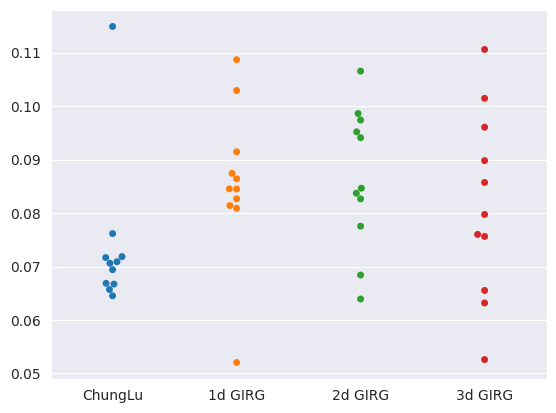

In [18]:
import seaborn as sns
sns.swarmplot(data=data)

Network Properties:
nodes, edges			1500, 29589
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026319
clustering coefficient		0.508157
min/max/avg degree		6, 1130, 39.452000
degree assortativity		-0.117958
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.8486849404968304
0.8695943578580893
0.887839941292833
0.8654453733111286
0.8698784319360375
0.8499141802471221
1
0.9001698940255626
0.8265262214660585
0.8884306983588665
0.8528079347914476
0.8326166320044275
0.8796691000216649
2
0.830897128388437
0.8879895261544168
0.8570412206174715
0.8539321025903469
0.8726578657221924
0.8930691723390879
3
0.9019228975044746
0.8634791139615262
0.8533669087050367
0.8507830523524329
0.8712005281061368
0.8580575675411624


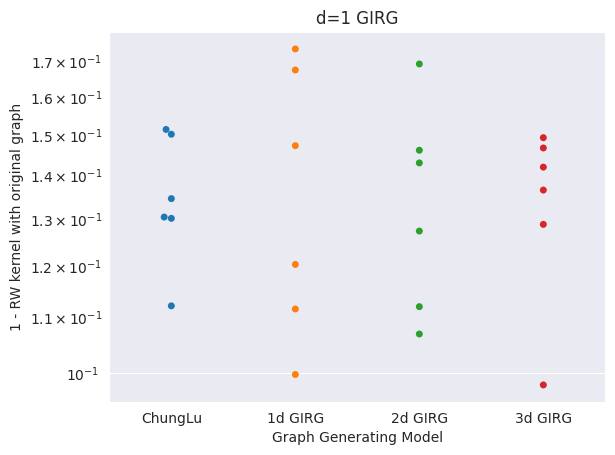

In [20]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=1500, tau=2.5, alpha=1.5, desiredAvgDegree=40.0, kernel=grakel.WeisfeilerLehman(n_iter=10, normalize=True), n_per=6, node_labelling_func=lambda g: graph_to_labels(g, num_colors=15), plot_type='swarmplot')

Network Properties:
nodes, edges			1500, 29919
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026612
clustering coefficient		0.530013
min/max/avg degree		6, 1145, 39.892000
degree assortativity		-0.148087
number of connected components	1
size of largest component	1500 (100.00 %)
cl
0.7893731256799515
0.7841364236830395
0.7525710715242127
0.7703133630163416
0.7384173374773089
0.7914660953033
1
0.7462522811318136
0.6993362663611871
0.7453728366609169
0.7545144715714442
0.742563942005467
0.72152729002129
2
0.8165432043593943
0.756499605001228
0.8044520400387398
0.7479979656979371
0.7860759097954041
0.7616323654521282
3
0.7820368269188663
0.7534226826204591
0.7945038586260801
0.7650638893816256
0.7701748942972344
0.7428531828778431


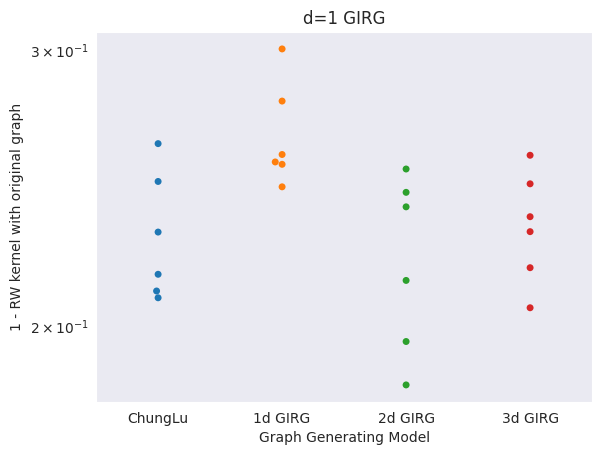

In [21]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=1500, tau=2.5, alpha=1.5, desiredAvgDegree=40.0, kernel=grakel.WeisfeilerLehman(n_iter=10, normalize=True), n_per=6, node_labelling_func=lambda g: graph_to_labels(g, num_colors=30), plot_type='swarmplot')

In [15]:
nk.overview(g)

Network Properties:
nodes, edges			3000, 74646
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.016594
clustering coefficient		0.802422
min/max/avg degree		8, 2682, 49.764000
degree assortativity		-0.152124
number of connected components	1
size of largest component	3000 (100.00 %)


<AxesSubplot: >

Text(0, 0.5, '1 - RW kernel with original graph')

Text(0.5, 0, 'Graph Generating Model')

Text(0.5, 1.0, 'd=2 GIRG')

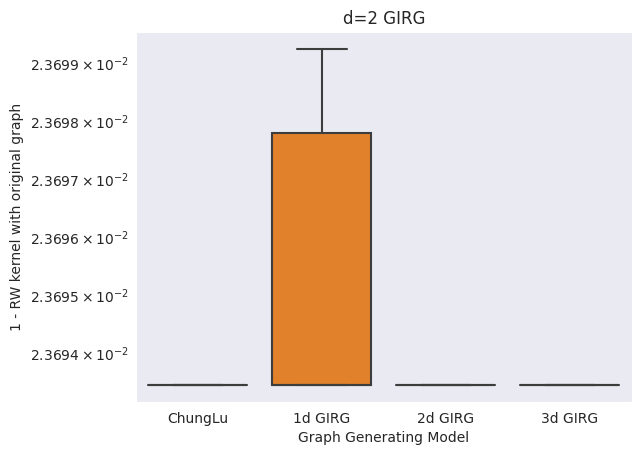

In [35]:
import seaborn as sns
sns.boxplot(data=data)
plt.yscale('log')
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')
plt.title(f'd={d} GIRG')

Network Properties:
nodes, edges			5000, 124705
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009978
clustering coefficient		0.797281
min/max/avg degree		8, 4999, 49.882000
degree assortativity		-0.088836
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9551027632863961
0.9551027632863961
0.9551027632863961
0.9551027632863961
0.9551027632863961
0.9551027632863961
1
0.946443548779435
0.9438509979939567
0.9422026831562256
0.9462595765470584
0.9461704622905928
0.9453611337845516
2
0.9448609403403276
0.9439582707807819
0.9403145234599082
0.9362823312838332
0.9415957465723468
0.9436390669889442
3
0.9398924155966114
0.9434310485347157
0.9440903936894277
0.9456007161759024
0.9471495078962928
0.9460368443303412


(    ChungLu   1d GIRG   2d GIRG   3d GIRG
 0  0.044897  0.053556  0.055139  0.060108
 1  0.044897  0.056149  0.056042  0.056569
 2  0.044897  0.057797  0.059685  0.055910
 3  0.044897  0.053740  0.063718  0.054399
 4  0.044897  0.053830  0.058404  0.052850
 5  0.044897  0.054639  0.056361  0.053963,
 {'n': 5000,
  'tau': 2.5,
  'alpha': 5.0,
  'desiredAvgDegree': 50.0,
  'd': 1,
  'kernel': WeisfeilerLehman(normalize=True),
  'points_type': benji_girgs.points.PointsTorus2,
  'c_implementation': True})

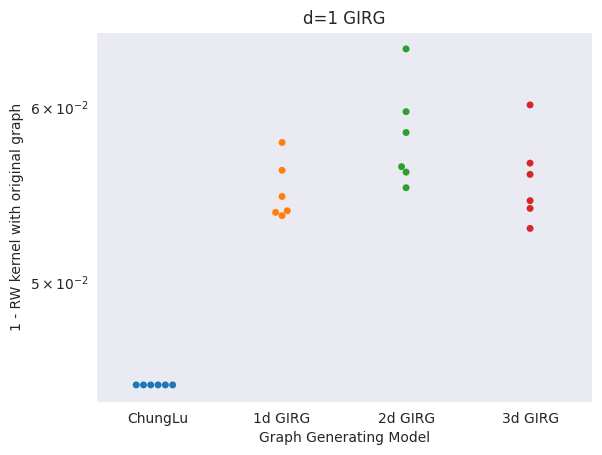

In [28]:
graph_kernels.multiple_girg_comparisons(d=1, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v))

Network Properties:
nodes, edges			5000, 124605
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009970
clustering coefficient		0.725222
min/max/avg degree		5, 2965, 49.842000
degree assortativity		-0.103369
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9530481162904255
0.9530481162904255
0.9530481162904255
0.9530481162904255
0.9530481162904255
0.9530481162904255
1
0.9436618255473289
0.9452373665784226
0.9429630342886186
0.9445837118168051
0.9440284567472929
0.9475093287977442
2
0.9409771434715527
0.9427559468738487
0.9406546598528615
0.943854764565045
0.9424474021630851
0.9436886867688872
3
0.9428175766531613
0.9441023298743321
0.9449741274005472
0.9390613518417896
0.9442382936345546
0.9431108963185789


(    ChungLu   1d GIRG   2d GIRG   3d GIRG
 0  0.046952  0.056338  0.059023  0.057182
 1  0.046952  0.054763  0.057244  0.055898
 2  0.046952  0.057037  0.059345  0.055026
 3  0.046952  0.055416  0.056145  0.060939
 4  0.046952  0.055972  0.057553  0.055762
 5  0.046952  0.052491  0.056311  0.056889,
 {'n': 5000,
  'tau': 2.5,
  'alpha': 5.0,
  'desiredAvgDegree': 50.0,
  'd': 2,
  'kernel': WeisfeilerLehman(normalize=True),
  'points_type': benji_girgs.points.PointsTorus2,
  'c_implementation': True})

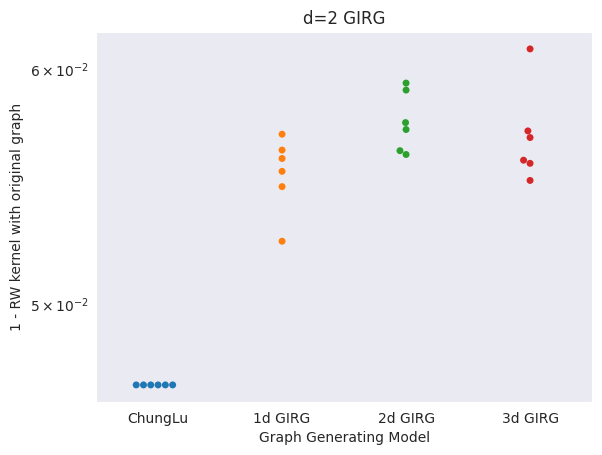

In [29]:
data, info = graph_kernels.multiple_girg_comparisons(d=2, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v))

In [ ]:
data, info = graph_kernels.multiple_girg_comparisons(d=1, n=5000, tau=2.5, alpha=5.0, desiredAvgDegree=50.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=6, node_labelling_func=lambda g, v: g.degree(v))

In [11]:
g = nk.Graph(8)
g.addEdge(2, 3)
g.addEdge(3, 4)
g.addEdge(4, 5)
g.addEdge(2, 5)
g.addEdge(6, 7)

gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
A

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])

In [10]:
g = nk.Graph(6)
g.addEdge(0, 1)
g.addEdge(1, 2)
g.addEdge(2, 3)
g.addEdge(0, 3)
g.addEdge(4, 5)

gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
A

array([[0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [26]:
graph_kernels.multiple_girg_comparisons(d=1, n=100, tau=2.5, alpha=1.5, desiredAvgDegree=20.0, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), n_per=3, node_labelling_func=lambda g, v: g.degree(v))

Network Properties:
nodes, edges			100, 994
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.200808
clustering coefficient		0.584483
min/max/avg degree		5, 86, 19.880000
degree assortativity		-0.155669
number of connected components	1
size of largest component	100 (100.00 %)


ValueError: Graph does not have any labels for vertices.

In [16]:
rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-5, kernel_type='geometric')
rw_kernel.fit_transform([g_gk, g_gk1])

array([[1.        , 0.99998873],
       [0.99998873, 1.        ]])

array([[1.]])

cl
0.9999918099131951
0.9999924435160406
0.9999924883381476


../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


0.999995675577508
0.999996417334321
0.999994882361533


<AxesSubplot: >

Text(55.847222222222214, 0.5, '1 - RW kernel with original graph')

Text(0.5, 23.52222222222222, 'Graph Generating Model')

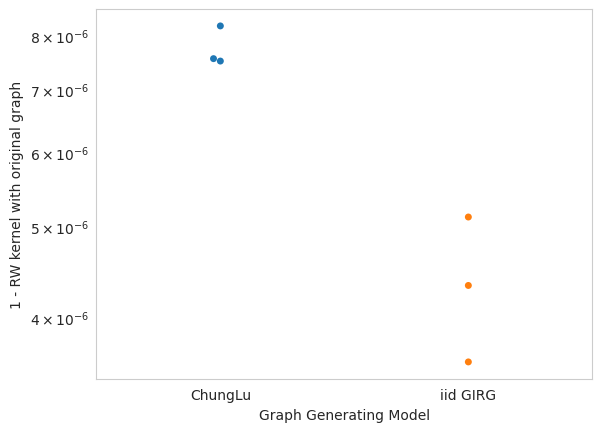

In [17]:
import warnings
import seaborn as sns

rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])

def g_out_to_similarity(g_out):
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)
    return rw_kernel.transform([g_gk1])[0, 0]


outs = []
n_per = 3
outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    out = g_out_to_similarity(g1)
    print(out)
    outs[-1].append(out)


outs.append([])
for i in range(n_per):
    g = gen_girg()
    out = g_out_to_similarity(g)
    print(out)
    outs[-1].append(out)


data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', 'iid GIRG'])
sns.swarmplot(data=data)
plt.yscale('log')
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')

In [9]:
def multiple_girg_comparisons(d=1):
    n = 1000
    # d=2
    tau=2.5
    alpha=1.5
    desiredAvgDegree= 50.0

    def gen_girg(d):
        g, edges, weights, pts, const = generation.generate_GIRG_nk(
            n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsTorus2, c_implementation=True)
        return g

    g = gen_girg(d)

    # g = generation.chung_lu_mixin_graph(g, weights, 0.5)
    g = utils.get_largest_component(g)
    nk.overview(g)
    # n = g.numberOfNodes()


    gnx = nk.nxadapter.nk2nx(g)
    A = nx.adjacency_matrix(gnx).todense()
    g_gk = grakel.Graph(A)

    import warnings
    import seaborn as sns

    # rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
    # rw_kernel.fit_transform([g_gk])
    rw_kernel = grakel.kernels.ShortestPath(normalize=True, with_labels=False)
    rw_kernel.fit_transform([g_gk])


    def g_out_to_similarity(g_out):
        A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
        g_gk1 = grakel.Graph(A1)
        return rw_kernel.transform([g_gk1])[0, 0]


    outs = []
    n_per = 3
    outs.append([])
    print('cl')
    for i in range(n_per):
        g1 = generation.fit_chung_lu(g, seed=i)
        out = g_out_to_similarity(g1)
        print(out)
        outs[-1].append(out)


    for d1 in [1, 2, 3]:
        print(d1)
        outs.append([])
        for i in range(n_per):
            g = gen_girg(d1)
            out = g_out_to_similarity(g)
            print(out)
            outs[-1].append(out)


    data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', '1d GIRG', '2d GIRG', '3d GIRG'])
    sns.swarmplot(data=data)
    plt.yscale('log')
    plt.ylabel('1 - RW kernel with original graph')
    plt.xlabel('Graph Generating Model')
    plt.title(f'd={d} GIRG')

Network Properties:
nodes, edges			1000, 24963
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.049976
clustering coefficient		0.511384
min/max/avg degree		12, 619, 49.926000
degree assortativity		-0.131303
number of connected components	1
size of largest component	1000 (100.00 %)
cl
0.9990133299009022
0.9987511793024239
0.9990636360315382
1
0.9923170985474642
0.9975277168779864
0.9997604031141871
2
0.9923440769188056
0.9917786987570971
0.9891923568517244
3
0.9971330009344267
0.9914103834803405
0.9999970546382881


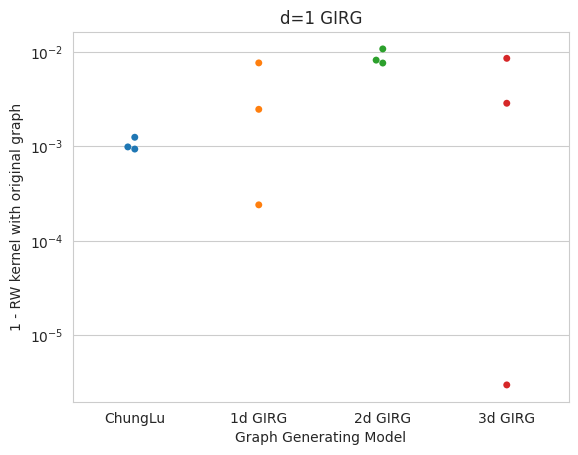

In [10]:
multiple_girg_comparisons(1)

In [29]:
multiple_girg_comparisons(2)

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


Network Properties:
nodes, edges			5000, 124416
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.009955
clustering coefficient		0.418672
min/max/avg degree		9, 1379, 49.766400
degree assortativity		-0.063198
number of connected components	1
size of largest component	5000 (100.00 %)
cl
0.9999999245816945
0.9999998982682622
0.9999999145615904
1


../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


0.9999913198414127
0.999998005038737
0.9999966697728003
2
0.9999770932172345
0.9999830707647405


KeyboardInterrupt: 

In [ ]:
multiple_girg_comparisons(3)

In [10]:
fe = feature_extractor.FeatureExtractor([])
info, g_out = fe.fit_ndgirg_non_c_implementation(1, utils.LCC, cube=False, copy_weights=True, verbose=True)(g)

calling goal_f(alpha=100.0)
calling goal_f(alpha=2.0)
calling goal_f(alpha=1.0101010101010102)
a: 0.01, m: 0.5, b: 0.99, f_a: 0.7985233449897305, f_m: 0.6112889305745735, f_b: 0.2240963064554667, goal: 0.4793635656092471

calling goal_f(alpha=1.342281879194631)
a: 0.5, m: 0.745, b: 0.99, f_a: 0.6112889305745735, f_m: 0.4002385916804324, f_b: 0.2240963064554667, goal: 0.4793635656092471

calling goal_f(alpha=1.6064257028112447)
a: 0.5, m: 0.6225, b: 0.745, f_a: 0.6112889305745735, f_m: 0.5023838894085333, f_b: 0.4002385916804324, goal: 0.4793635656092471

calling goal_f(alpha=1.462522851919561)
a: 0.6225, m: 0.6837500000000001, b: 0.745, f_a: 0.5023838894085333, f_m: 0.4478084640324358, f_b: 0.4002385916804324, goal: 0.4793635656092471

calling goal_f(alpha=1.5311004784688993)
a: 0.6225, m: 0.6531250000000001, b: 0.6837500000000001, f_a: 0.5023838894085333, f_m: 0.47402484559637525, f_b: 0.4478084640324358, goal: 0.4793635656092471

calling goal_f(alpha=1.5678588926996568)
a: 0.6225, m:

In [11]:
nk.overview(g_out)

Network Properties:
nodes, edges			2000, 49913
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.024969
clustering coefficient		0.481302
min/max/avg degree		4, 994, 49.913000
degree assortativity		-0.073083
number of connected components	1
size of largest component	2000 (100.00 %)


array([[1.]])

cl
0.9999976581042318
0.9999973730112305
0.9999979606277212
1
0.9999966386702969
0.9999971996981347
0.9999970865684548
2
0.9999978925073064
0.9999974941606985
0.9999976941996892
3
0.9999980963470168
0.9999980389740671
0.9999980701722689
4
0.9999987730686426
0.9999988636375683
0.9999988634298059


<AxesSubplot: >

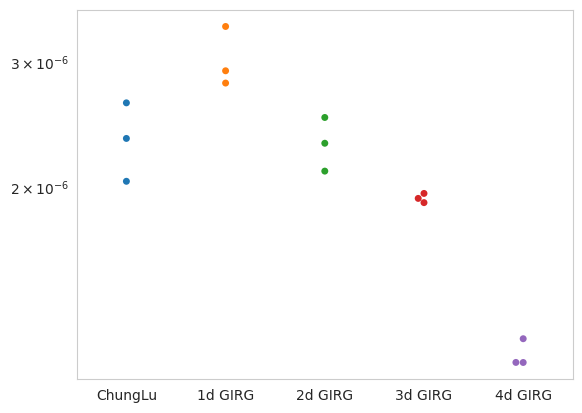

In [13]:
import warnings
import seaborn as sns
gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)

rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])

def fit_cube(g, kernel, d=1, name='sofcb-Reed98'):
    fe = feature_extractor.FeatureExtractor([])
    info, g_out = fe.fit_ndgirg_non_c_implementation(d, utils.LCC, cube=True, copy_weights=True, verbose=False)(g)

    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)

    return kernel.transform([g_gk1])[0, 0]

def fit_torus(g, kernel, d=1):
    fe = feature_extractor.FeatureExtractor([])
    info, g_out = fe.fit_ndgirg_non_c_implementation(d, utils.LCC, cube=False, copy_weights=True, verbose=False)(g)

    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)

    return kernel.transform([g_gk1])[0, 0]

name='n=2000 2D GIRG tau=2.5 a=1.5 dbar=50 LCC fit torus'
outs = []
n_per = 3
outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    # nk.overview(g1)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = rw_kernel.transform([g_gk1])[0, 0]
    print(out)
    outs[-1].append(out)

for d in range(1, 5):
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = fit_torus(g, rw_kernel, d=d)
        outs[-1].append(out)
        print(out)

data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', '1d GIRG', '2d GIRG', '3d GIRG', '4d GIRG'])
sns.swarmplot(data=data)
plt.yscale('log')

<AxesSubplot: >

Text(0.5, 1.0, 'n=2000 2D GIRG tau=2.5 a=1.5 dbar=50 LCC fit torus')

Text(50.222222222222214, 0.5, '1 - RW kernel with original graph')

Text(0.5, 36.72222222222221, 'Graph Generating Model')

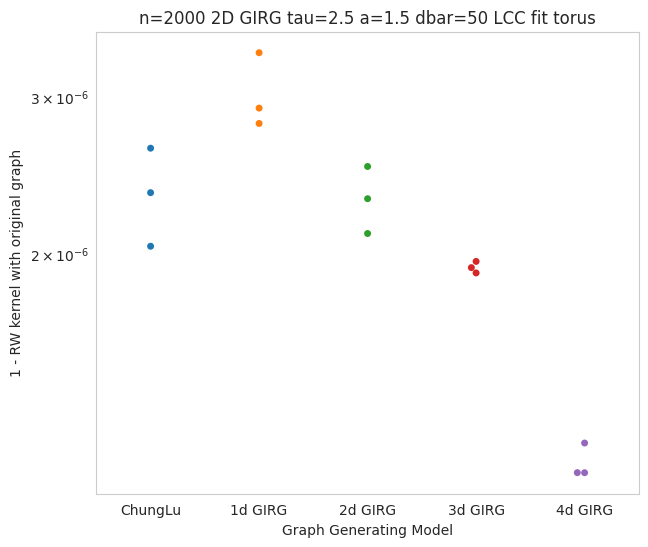

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
folder = '../kernel_generated_plots'
os.makedirs(folder, exist_ok=True)
data = pd.DataFrame(1 - np.array(outs).T, columns=['ChungLu', '1d GIRG', '2d GIRG', '3d GIRG', '4d GIRG'])
sns.swarmplot(data=data)
plt.yscale('log')
plt.title(f"{name}")
plt.ylabel('1 - RW kernel with original graph')
plt.xlabel('Graph Generating Model')
plt.savefig(f'{folder}/{name}.png')
pickle.dump((fig, ax), open(f'{folder}/{name}.pkl', 'wb'))

In [16]:
rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])
# exponential just takes forever???

def get_rw_kernel(g1):
    return rw_kernel.transform([g1])[0, 0]

array([[1.]])

In [26]:
from feature_extractor import FeatureExtractor
fe = FeatureExtractor([])

def temp(d=1):
    # _, _, _, _, _, MC = mcmc.g_initialised_mcmc(g, alpha=1.3, const=1.0, pts_d=d, diffmap_init=False, graph_name='Reed98', failure_prob=0.3, cl_mixin_prob=0.5)
    # g_MC = MC_to_g_grakel(MC)

    g1, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,
                                                                points_type=points.PointsCube, failure_rate=0.3,
                                                                cl_mixin_prob=0.0)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)

    return get_rw_kernel(g_gk1)


def temp_fit(d=1):
    info, g_out = fe.fit_ndgirg_general(d, utils.LCC, cube=False, copy_weights=True, verbose=False)(g)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g_out)).todense()
    g_gk1 = grakel.Graph(A1)

    return get_rw_kernel(g_gk1)

def temp_copyweight_cube(d=1, name='sofcb-Reed98'):
    row = df.loc[df.Graph == name].sort_values('Model').iloc[d-1]
    alpha = row.alpha
    const = float(row.Info['const'])

    weights = np.array(utils.graph_degrees_to_weights(g))
    g1, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, const=const, weights=weights,
                                                                points_type=points.PointsCube)
    # nk.overview(g1)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)

    return get_rw_kernel(g_gk1)

def MC_to_g_grakel(MC):
    _, A_MC = MC.MC_to_g_A()
    return grakel.Graph(A_MC)


In [38]:
import importlib
importlib.reload(generation)

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

'/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne'

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)
cl
0.9990804428429227
0.9990776207349124
0.9990740809235421
0.9990906643176521
1
0.9991202742809211
0.9991442686936233
0.9991396569092426
0.9990867031672427
2
0.9990572963422394
0.99914131674861
0.999094264845294
0.999094017048572
3
0.9990935569430259
0.9990727826085387
0.999141852540862
0.9991086087897754


<AxesSubplot: >

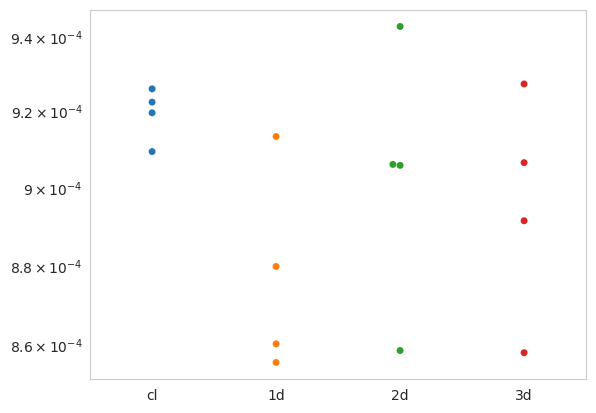

In [46]:
import warnings
import seaborn as sns


name = 'socfb-Amherst41'

gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()


gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)


outs = []

n_per = 4

outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = get_rw_kernel(g_gk1)
    print(out)
    outs[-1].append(out)

for d in range(1, 4):
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = temp_copyweight_cube(d=d, name=name)
        outs[-1].append(out)
        print(out)


data = pd.DataFrame(1 - np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)
plt.yscale('log')


'/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne'

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)


array([[1.]])

cl
0.9999999977921624
0.9999999918599373
0.9999999811197327
0.999999977744551
1
0.9999994391300787
0.9999987706374487
0.9999989146521039
0.9999988839585013
2
0.9999992973935816
0.9999997289128006
0.9999991832588693
0.9999993900357466
3
0.9999992668916675
0.9999989151483528
0.9999988130952565
0.9999993430895892


<AxesSubplot: >

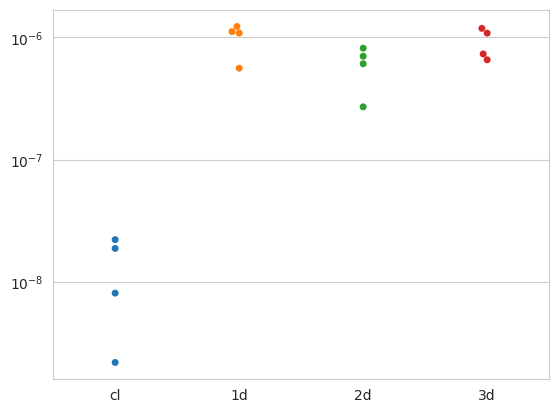

In [47]:
import warnings
import seaborn as sns


name = 'socfb-Amherst41'

gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()


gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)


rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=1e-6, kernel_type='geometric')
rw_kernel.fit_transform([g_gk])
# exponential just takes forever???

def get_rw_kernel(g1):
    return rw_kernel.transform([g1])[0, 0]


outs = []

n_per = 4

outs.append([])
print('cl')
for i in range(n_per):
    g1 = generation.fit_chung_lu(g, seed=i)
    A1 = nx.linalg.adjacency_matrix(nk.nxadapter.nk2nx(g1)).todense()
    g_gk1 = grakel.Graph(A1)
    out = get_rw_kernel(g_gk1)
    print(out)
    outs[-1].append(out)

for d in range(1, 4):
    print(d)
    outs.append([])
    for i in range(n_per):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            out = temp_copyweight_cube(d=d, name=name)
        outs[-1].append(out)
        print(out)


data = pd.DataFrame(1 - np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)
plt.yscale('log')


<AxesSubplot: >

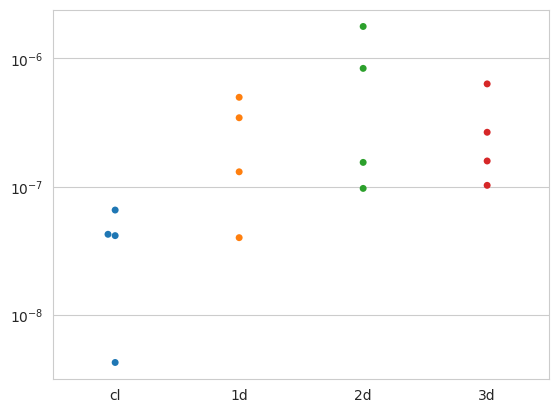

In [40]:
import seaborn as sns
data = pd.DataFrame(1 - np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)
plt.yscale('log')

In [45]:
df_mini.loc[df_mini.Model=='1d-copyweight-cube-girg'].sort_values('Nodes')

,Graph,Model,Type,Nodes,Edges,Info,alpha
0,socfb-Caltech36,1d-copyweight-cube-girg,socfb,756,16766,"{'tau': '7.3017225936374555', 'alpha': '1.2171...",1.217193
1,socfb-Reed98,1d-copyweight-cube-girg,socfb,955,18329,"{'tau': '4.381732472502371', 'alpha': '1.07671...",1.076716
4,socfb-Haverford76,1d-copyweight-cube-girg,socfb,1440,57770,"{'tau': '6.5461700448727616', 'alpha': '1.0592...",1.059252
3,socfb-Simmons81,1d-copyweight-cube-girg,socfb,1497,33125,"{'tau': '4.739342146243066', 'alpha': '1.16300...",1.163002
6,socfb-Swarthmore42,1d-copyweight-cube-girg,socfb,1657,61392,"{'tau': '5.598783007439967', 'alpha': '1.04234...",1.042345
...,...,...,...,...,...,...,...
162,socfb-MSU24,1d-copyweight-cube-girg,socfb,32345,1115806,"{'tau': '5.112979295133962', 'alpha': '1.02195...",1.021956
167,socfb-UF,1d-copyweight-cube-girg,socfb,35095,1454892,"{'tau': '4.918454781144023', 'alpha': '1.05073...",1.050731
165,socfb-UF21,1d-copyweight-cube-girg,socfb,35101,1448482,"{'tau': '4.918454781144023', 'alpha': '1.04652...",1.046521
117,socfb-Texas84,1d-copyweight-cube-girg,socfb,36354,1576966,"{'tau': '4.774843344808111', 'alpha': '1.01010...",1.010101


<AxesSubplot: >

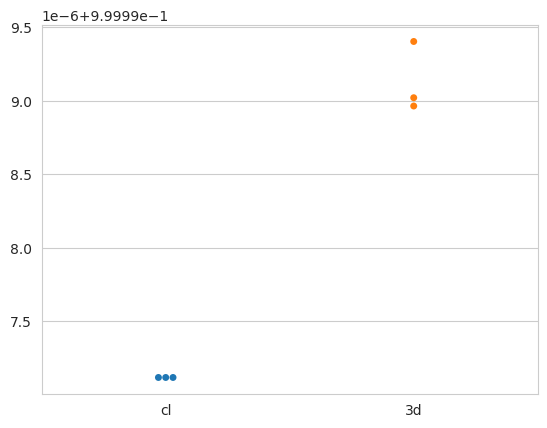

In [45]:
sns.swarmplot(data.loc[:, ['cl', '3d']])

In [61]:
outs[-1] = outs[-1] + [outs[-1][0]]

<AxesSubplot: >

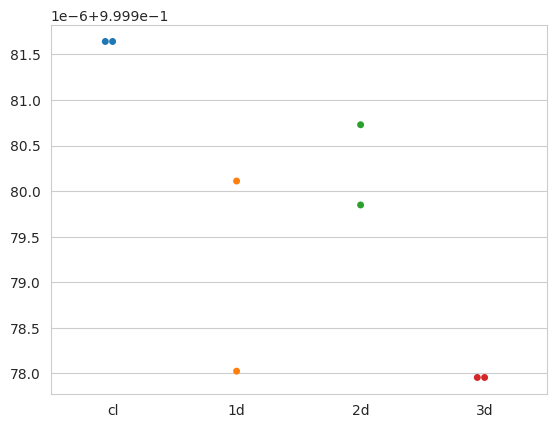

In [62]:
# outs = np.array(outs)
import seaborn as sns
# data = pd.DataFrame(np.array(outs).T, columns=['cl', '1d', '2d', '3d', '4d'])
data = pd.DataFrame(np.array(outs).T, columns=['cl', '1d', '2d', '3d'])
sns.swarmplot(data=data)

In [64]:
from feature_extractor import FeatureExtractor
fe = FeatureExtractor([])
info, g_out = fe.fit_ndgirg_non_c_implementation(1, utils.LCC, cube=True, copy_weights=True, verbose=True)(g)

calling goal_f(alpha=100.0)
starting search at const=0.601171875; depth=6: For alpha=100.0


../benji_girgs/generation.py:647: RuntimeWarning: divide by zero encountered in divide
  """
../benji_girgs/generation.py:648: RuntimeWarning: divide by zero encountered in divide
  n = g_true.numberOfNodes()
../benji_girgs/generation.py:138: RuntimeWarning: overflow encountered in multiply
  p_uv = np.minimum(const * p_uv, 1)
../benji_girgs/generation.py:647: RuntimeWarning: overflow encountered in power
  """
../benji_girgs/generation.py:647: RuntimeWarning: overflow encountered in multiply
  """
../benji_girgs/generation.py:648: RuntimeWarning: overflow encountered in power
  n = g_true.numberOfNodes()
../benji_girgs/generation.py:648: RuntimeWarning: overflow encountered in multiply
  n = g_true.numberOfNodes()


a: 0.3005859375, m: 0.601171875, b: 1.20234375, f_a: 23.313929313929314, f_m: 44.525987525987524, f_b: 87.66943866943868, goal: 39.11018711018711
a: 0.3005859375, m: 0.45087890625000004, b: 0.601171875, f_a: 23.313929313929314, f_m: 33.84199584199584, f_b: 44.525987525987524, goal: 39.11018711018711
a: 0.45087890625000004, m: 0.5260253906250001, b: 0.601171875, f_a: 33.84199584199584, f_m: 40.07276507276507, f_b: 44.525987525987524, goal: 39.11018711018711
a: 0.45087890625000004, m: 0.48845214843750007, b: 0.5260253906250001, f_a: 33.84199584199584, f_m: 36.84407484407485, f_b: 40.07276507276507, goal: 39.11018711018711
a: 0.48845214843750007, m: 0.5072387695312501, b: 0.5260253906250001, f_a: 36.84407484407485, f_m: 37.82744282744283, f_b: 40.07276507276507, goal: 39.11018711018711
calling goal_f(alpha=2.0)
starting search at const=0.3114983948594278; depth=6: For alpha=2.0
a: 0.1557491974297139, m: 0.3114983948594278, b: 0.6229967897188556, f_a: 23.62162162162162, f_m: 44.62577962577

In [75]:
temp = [x.split('=') for x in info.split('|')]
{a: eval(b) for a, b in temp}

{'tau': 4.381732472502371,
 'alpha': 1.0635646032405484,
 'const': 0.12118153114275264,
 'target_lcc': 0.31836022727227925,
 'fit_lcc': 0.31602744973881414,
 'fitting_time': 13.056175947189331,
 'hist': [(2.0, 0.6173220492572326),
  (1.342281879194631, 0.4376142442960426),
  (1.1527377521613833, 0.3591851552021037),
  (1.0767160161507403, 0.32872175111887136),
  (1.0423452768729642, 0.2887513543551115),
  (1.0592519033432637, 0.30417333385864403),
  (1.0679125646587686, 0.32066542408317),
  (1.0635646032405484, 0.3165918680902781)]}

In [8]:
import os
os.environ['DATA_PATH'] = '../../FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')

df.Info = df.Info.apply(lambda temp: {key: var for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: float(x['alpha']) if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

df_mini = df.loc[:, ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'Info', 'alpha']]


In [83]:
df_mini

,Graph,Model,Type,Nodes,Edges,Info
0,socfb-Caltech36,1d-copyweight-cube-girg,socfb,756,16766,"{'tau': '7.3017225936374555', 'alpha': '1.2171..."
1,socfb-Reed98,1d-copyweight-cube-girg,socfb,955,18329,"{'tau': '4.381732472502371', 'alpha': '1.07671..."
2,socfb-Caltech36,2d-copyweight-cube-girg,socfb,757,16863,"{'tau': '7.3017225936374555', 'alpha': '1.1949..."
3,socfb-Simmons81,1d-copyweight-cube-girg,socfb,1497,33125,"{'tau': '4.739342146243066', 'alpha': '1.16300..."
4,socfb-Haverford76,1d-copyweight-cube-girg,socfb,1440,57770,"{'tau': '6.5461700448727616', 'alpha': '1.0592..."
...,...,...,...,...,...,...
263,socfb-UConn91,2d-copyweight-cube-girg,socfb,17107,605172,"{'tau': '5.145909409369553', 'alpha': '1.08117..."
264,socfb-UMass92,3d-copyweight-cube-girg,socfb,16413,534207,"{'tau': '4.541851675093422', 'alpha': '1.08566..."
265,socfb-UC33,3d-copyweight-cube-girg,socfb,16688,504749,"{'tau': '4.812191215002762', 'alpha': '1.09476..."
266,socfb-UF21,3d-copyweight-cube-girg,socfb,34928,1467958,"{'tau': '4.918454781144023', 'alpha': '1.10870..."


In [81]:
df_mini.Info[1]

'tau=4.381732472502371|alpha=1.0767160161507403|const=0.11990006024738019|target_lcc=0.31836022727227925|fit_lcc=0.3122201463706791|fitting_time=19.216066598892212|hist=[(2.0, 0.601654218661161), (1.342281879194631, 0.4500069992020386), (1.1527377521613833, 0.34883587407667926), (1.0767160161507403, 0.3162678611423067), (1.1134307585247043, 0.3359806839067379), (1.0947656517276771, 0.32100278073945815), (1.0856658184902461, 0.33016551433112173), (1.0767160161507403, 0.3162678611423067)]'

In [68]:
{a: eval(b) for x in info.split('|') for a, b in x.split('=')}

ValueError: too many values to unpack (expected 2)

In [69]:
[(a, b) for a in range(3) for b in range(5)]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4)]

In [51]:
get_rw_kernel([g_out])

ValueError: Unsupported input type. For more information check the documentation, concerning valid input types for graph type object.

In [34]:
nk.overview(g)

Network Properties:
nodes, edges			1000, 22427
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.044899
clustering coefficient		0.257323
min/max/avg degree		7, 772, 44.854000
degree assortativity		-0.148806
number of connected components	1
size of largest component	1000 (100.00 %)


<AxesSubplot: >

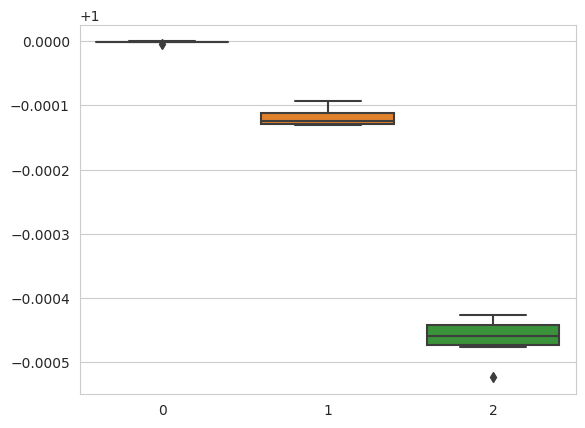

In [32]:
outs = np.array(outs)
import seaborn as sns
sns.boxplot(data=outs.T)

In [25]:
outs = np.array(outs)

<AxesSubplot: >

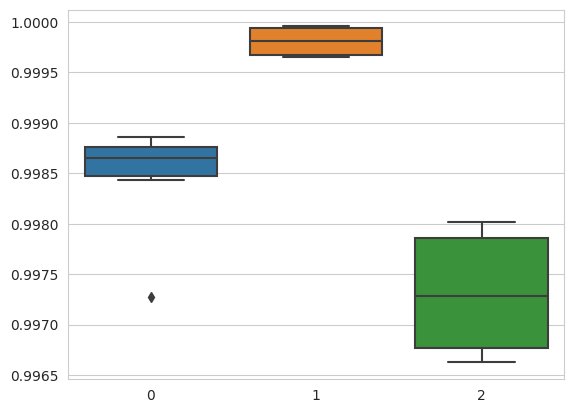

In [26]:
import seaborn as sns
sns.boxplot(data=outs.T)

In [25]:
print(f'MC: {MC.ll}')
print(f'MC_dm: {MC_dm.ll}')
print(f'MC2: {MC2.ll}')
print(f'MC_dm2: {MC_dm2.ll}')
print(f'MC_pickle: {MC_pickle.ll}')
print(f'MC_pickle2: {MC_pickle2.ll}')
print(f'chung_lu_ll: {chung_lu_ll}')

MC: -137860.2683948932
MC_dm: -131448.12255962266
MC2: -139035.93735796952
MC_dm2: -129457.22462367786
MC_pickle: -125363.74972813886
MC_pickle2: -124276.07541961469
chung_lu_ll: -128476.06068462234


In [31]:
_, A_MC = MC.MC_to_g_A()
_, A_MC_dm = MC_dm.MC_to_g_A()
_, A_MC_pickle = MC_pickle.MC_to_g_A()
_, A_MC2 = MC2.MC_to_g_A()
_, A_MC_dm2 = MC_dm2.MC_to_g_A()
_, A_MC_pickle2 = MC_pickle2.MC_to_g_A()

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:597: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:598: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


In [32]:
g_MC = grakel.Graph(A_MC)
g_MC_dm = grakel.Graph(A_MC_dm)
g_MC_pickle = grakel.Graph(A_MC_pickle)
g_MC2 = grakel.Graph(A_MC2)
g_MC_dm2 = grakel.Graph(A_MC_dm2)
g_MC_pickle2 = grakel.Graph(A_MC_pickle2)

gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()
g_gk = grakel.Graph(A)
g_CL = grakel.Graph(A_cl)

In [17]:
from grakel import GraphKernel
# sp_kernel = GraphKernel(kernel="shortest_path", with_labels=False)

sp_kernel = grakel.kernels.ShortestPath(with_labels=False)
sp_kernel_normalised = grakel.kernels.ShortestPath(with_labels=False, normalize=True)

rw_kernel = grakel.kernels.RandomWalk(normalize=False)
gs_kernel = grakel.kernels.GraphletSampling(n_jobs=5, normalize=True)

In [24]:
sp_kernel = grakel.kernels.ShortestPath(with_labels=False, normalize=True)
sp_kernel.fit_transform([g_gk])
sp_kernel.transform([g_MC_gk])

array([[1.]])

array([[0.99811444]])

In [27]:
def get_sp_kernel(g1, g2):
    sp_kernel = grakel.kernels.ShortestPath(with_labels=False, normalize=True)
    sp_kernel.fit_transform([g1])
    return sp_kernel.transform([g2])[0, 0]

get_sp_kernel(g_gk, g_MC_gk)

0.9981144435698038

In [36]:
# def get_rw_kernel(g1, g2):
#     rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=0.01)
#     rw_kernel.fit_transform([g1])
#     return rw_kernel.transform([g2])[0, 0]

rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=0.01)
rw_kernel.fit_transform([g_gk])

def get_rw_kernel(g1):
    return rw_kernel.transform([g1])[0, 0]

array([[1.]])

In [29]:
sp_kernel_normalised = grakel.kernels.ShortestPath(with_labels=False, normalize=True)
rw_kernel = grakel.kernels.RandomWalk(normalize=True, lamda=0.01)

array([[1.        , 3.76081314],
       [3.76081314, 1.        ]])

array([[1.        , 2.40027707],
       [2.40027707, 1.        ]])

array([[1.        , 1.86030097],
       [1.86030097, 1.        ]])

In [33]:
rw_kernel.fit_transform([g_gk, g_CL])

array([[1.        , 1.86030097],
       [1.86030097, 1.        ]])

In [34]:
rw_kernel.fit_transform([g_gk, g_MC])
rw_kernel.fit_transform([g_gk, g_MC_dm])
rw_kernel.fit_transform([g_gk, g_MC_pickle])

array([[1.        , 3.26718743],
       [3.26718743, 1.        ]])

array([[1.        , 2.38644082],
       [2.38644082, 1.        ]])

array([[1.        , 2.80388135],
       [2.80388135, 1.        ]])

In [35]:
rw_kernel.fit_transform([g_gk, g_MC2])
rw_kernel.fit_transform([g_gk, g_MC_dm2])
rw_kernel.fit_transform([g_gk, g_MC_pickle2])

array([[ 1.        , 11.11950001],
       [11.11950001,  1.        ]])

array([[1.        , 2.23600994],
       [2.23600994, 1.        ]])

array([[1.        , 2.80352438],
       [2.80352438, 1.        ]])

In [39]:
for d in [1, 2, 3, 4, 5]:
    print(d)
    _, _, _, _, _, MC_temp = mcmc.g_initialised_mcmc(g, 1.2, 1.0, pts_d=2, diffmap_init=False, graph_name='Reed98', failure_prob=0.3, cl_mixin_prob=0.5)
    _, A_MC_temp = MC_temp.MC_to_g_A()
    g_MC_temp = grakel.Graph(A_MC_temp)
    print(get_rw_kernel(g_MC_temp))


1
calibrating const
const: 1.0, expected_num_edges: 48068.583489804994
const: 0.39135748620489086, expected_num_edges: 30370.497031774434
const: 0.24241345219947688, expected_num_edges: 24268.47856832681
const: 0.1879096726206915, expected_num_edges: 21698.33377165328
const: 0.16291374252701923, expected_num_edges: 20441.07688473585
const: 0.14993013047697315, expected_num_edges: 19763.409983407142
const: 0.14271249834420413, expected_num_edges: 19378.652792121684
4.246706290743519
2
calibrating const
const: 1.0, expected_num_edges: 47559.57528476552
const: 0.3955460049288106, expected_num_edges: 30107.578105788325
const: 0.2471474596387484, expected_num_edges: 24160.48401913088
const: 0.19243563196178817, expected_num_edges: 21655.516112034482
const: 0.16716752857501208, expected_num_edges: 20417.368355170074
const: 0.15402354959995684, expected_num_edges: 19750.513344559335
const: 0.14670459266176789, expected_num_edges: 19372.096435222473
3.012945721995179
3
calibrating const
const:

KeyboardInterrupt: 

In [30]:
rw_kernel.fit_transform([g_gk, g_MC_pickle])

array([[1.        , 3.12473866],
       [3.12473866, 1.        ]])

In [29]:
help(grakel.kernels.RandomWalk)

Help on class RandomWalk in module grakel.kernels.random_walk:

class RandomWalk(grakel.kernels.kernel.Kernel)
 |  RandomWalk(n_jobs=None, normalize=False, verbose=False, lamda=0.1, method_type='fast', kernel_type='geometric', p=None)
 |  
 |  The random walk kernel class.
 |  
 |  See :cite:`kashima2003marginalized`, :cite:`gartner2003graph`
 |  and :cite:`vishwanathan2006fast`.
 |  
 |  Parameters
 |  ----------
 |  lambda : float
 |      A lambda factor concerning summation.
 |  
 |  method_type : str, valid_values={"baseline", "fast"}
 |      The method to use for calculating random walk kernel:
 |          + "baseline" *Complexity*: :math:`O(|V|^6)`
 |            (see :cite:`kashima2003marginalized`, :cite:`gartner2003graph`)
 |          + "fast" *Complexity*: :math:`O((|E|+|V|)|V||M|)`
 |            (see :cite:`vishwanathan2006fast`)
 |  
 |  kernel_type : str, valid_values={"geometric", "exponential"}
 |      Defines how inner summation will be applied.
 |  
 |  p : int or None


In [13]:
K = sp_kernel_normalised.fit_transform([g_gk, g_MC_gk])
print(K)
K1 = sp_kernel_normalised.fit_transform([g_gk, g_MC_dm_gk])
print(K1)
K2 = sp_kernel_normalised.fit_transform([g_gk, g_CL_gk])
print(K2)

[[1.         0.99811444]
 [0.99811444 1.        ]]
[[1.         0.99225746]
 [0.99225746 1.        ]]
[[1.         0.98077829]
 [0.98077829 1.        ]]


In [15]:
K = sp_kernel_normalised.fit_transform([g_gk, g_MC_gk])
print(K)
K1 = sp_kernel_normalised.fit_transform([g_gk, g_MC_dm_gk])
print(K1)
K2 = sp_kernel_normalised.fit_transform([g_gk, g_CL_gk])
print(K2)

[[1.         0.99811444]
 [0.99811444 1.        ]]
[[1.         0.99225746]
 [0.99225746 1.        ]]
[[1.         0.98077829]
 [0.98077829 1.        ]]


In [18]:
K = rw_kernel.fit_transform([g_gk, g_MC_gk])
print(K)
K1 = rw_kernel.fit_transform([g_gk, g_MC_dm_gk])
print(K1)
K2 = rw_kernel.fit_transform([g_gk, g_CL_gk])
print(K2)

[[ 103194.75668132 -181671.67808457]
 [-181671.67808457  -22338.72470025]]
[[ 103194.75668132 -317003.15497867]
 [-317003.15497867 -566440.74507411]]
[[ 103194.75668132  102674.57379999]
 [ 102674.57379999 -561337.38579245]]


In [19]:
K, K1

(array([[1.        , 0.99899907],
        [0.99899907, 1.        ]]),
 array([[1.        , 0.98077829],
        [0.98077829, 1.        ]]))

In [36]:
K, K1

(array([[ 1., nan],
        [nan, -1.]]),
 array([[ 1., nan],
        [nan, -1.]]))

In [37]:
nk.overview(g)

Network Properties:
nodes, edges			962, 18812
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.040697
clustering coefficient		0.318360
min/max/avg degree		1, 313, 39.110187
degree assortativity		0.024395
number of connected components	1
size of largest component	962 (100.00 %)


In [28]:
K = sp_kernel.fit_transform([g_temp_gk, g_gk])
K2 = sp_kernel_normalised.fit_transform([g_temp_gk, g_gk])

In [29]:
K
K2

array([[3.67635764e+11, 3.63211829e+11],
       [3.63211829e+11, 3.59653652e+11]])

array([[1.        , 0.99886977],
       [0.99886977, 1.        ]])

In [7]:
import pickle

name='socfb-Swarthmore42'

gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

pickle_path = '../../MCMC_run_fp_0p3_cl_0p5_v2/pickles/'
with open(pickle_path + name + '-1d' + '.pkl', 'rb') as file:
    MC1 = pickle.load(file)

MC1.calibrate_const()

with open(pickle_path + name + '-2d' + '.pkl', 'rb') as file:
    MC2 = pickle.load(file)

MC2.calibrate_const()

'/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne'

Network Properties:
nodes, edges			1657, 61049
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.044496
clustering coefficient		0.296897
min/max/avg degree		1, 577, 73.686180
degree assortativity		0.061163
number of connected components	1
size of largest component	1657 (100.00 %)


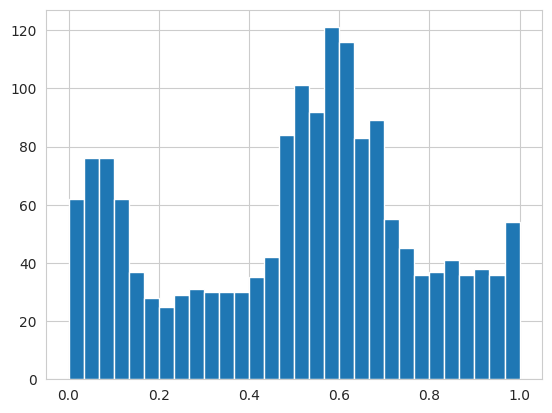

In [8]:
_ = plt.hist(MC1.pts[:, 0], bins=30)

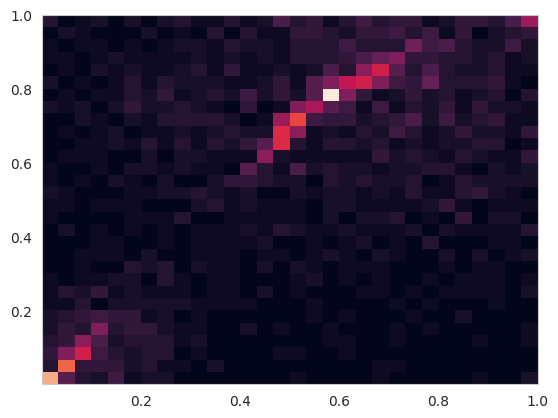

In [9]:
_ = plt.hist2d(MC2.pts[:, 0], MC2.pts[:, 1], bins=30)

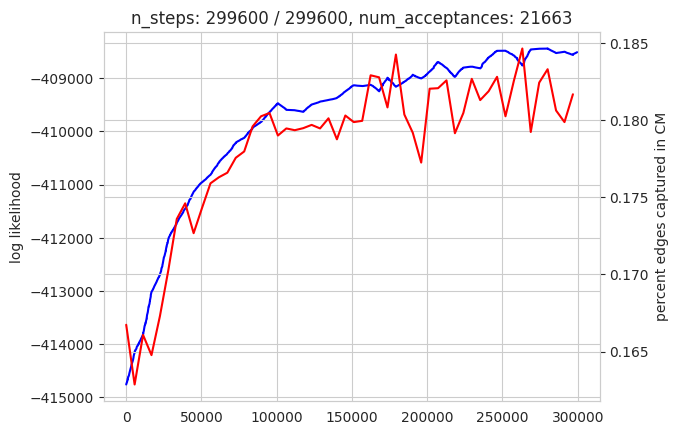

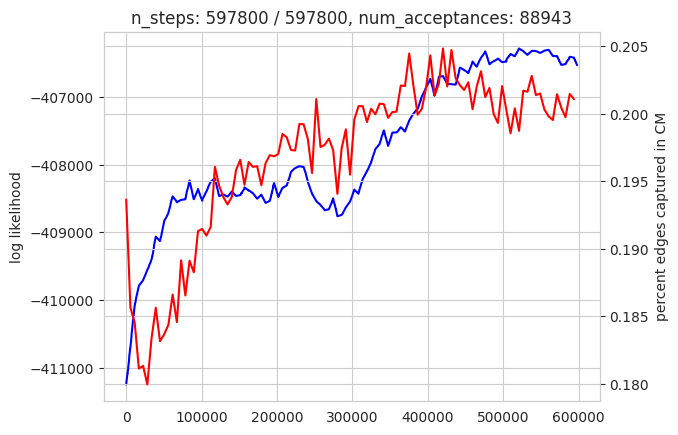

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC1.plot_ll(MC1.num_steps, CM=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC2.plot_ll(MC2.num_steps, CM=True)


In [19]:
importlib.reload(mcmc)
importlib.reload(generation)

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

In [20]:
alpha = MC1.alpha
const=MC1.const
lls = []
for _ in range(2):
    print(_)
    i = 0
    graph_name = name
    _, _, _, _, pts, MC_prior = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                    diffmap_init=False, graph_name=graph_name + f'-{i+1}d',
                                                                            failure_prob=0.3, cl_mixin_prob=0.5)
    lls.append(MC_prior.ll)

0
calibrating const
const: 0.11027144113091161, expected_num_edges: 51782.386914062554
const: 0.13000484548488095, expected_num_edges: 54751.59647450031
const: 0.14495770576667794, expected_num_edges: 56924.876490861854
const: 0.15545967817375123, expected_num_edges: 58415.308628834544
const: 0.1624686767150731, expected_num_edges: 59394.12274976218
const: 0.16699548348524454, expected_num_edges: 60020.396973969546
const: 0.16985737824613453, expected_num_edges: 60413.84415580018
1
calibrating const
const: 0.11027144113091161, expected_num_edges: 51797.964067984285
const: 0.12996574924770007, expected_num_edges: 54770.817172966934
const: 0.14486325812460107, expected_num_edges: 56945.072557326566
const: 0.1553032887322387, expected_num_edges: 58434.39215167722
const: 0.16225223065903507, expected_num_edges: 59410.73710529938
const: 0.16672636819750694, expected_num_edges: 60033.708928759945
const: 0.16954604727434167, expected_num_edges: 60424.10155801656


In [21]:
lls

[-450449.67519169167, -449984.8583343092]

In [23]:
chung_lu_ll, er_ll, A_cl, probs_cl = generation.chung_lu_get_stuff(MC_prior.g)
print(chung_lu_ll, er_ll)

-423188.2874977369 -1901990.3182789893


In [22]:
MC_prior.outs[0]

(array([[  12000,  110098],
        [ 107110, 2516441]]),
 0)

In [23]:
MC1.outs[0]

(array([[  20358,  101740],
        [ 101456, 2522095]]),
 0)

In [121]:
alpha = MC2.alpha
const = MC2.const
i=1

# _, _, _, _, _, MC = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                                 diffmap_init=False, graph_name=name + f'-{i+1}d',                                                       failure_prob=0.3)

_, _, _, _, _, MC_dm = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                                 diffmap_init=True, graph_name=name + f'-{i+1}d',                                                       failure_prob=0.3)

calibrating const
const: 0.04532197721532701, expected_num_edges: 59946.8871166855
const: 0.014222540591893745, expected_num_edges: 32130.768001902805
const: 0.008327047570069298, expected_num_edges: 23147.950971812304
const: 0.006767269339687878, expected_num_edges: 20265.172586641856
const: 0.006282002794396346, expected_num_edges: 19308.27407722848
const: 0.006120538588560746, expected_num_edges: 18982.81673054486
const: 0.006065462969082773, expected_num_edges: 18871.068299147813


In [118]:
MC_temp1.calculate_ll()
MC_temp2.calculate_ll()

(-169331.2210693177, 18810.98512856123)

(-165513.67828647894, 18832.78446100949)

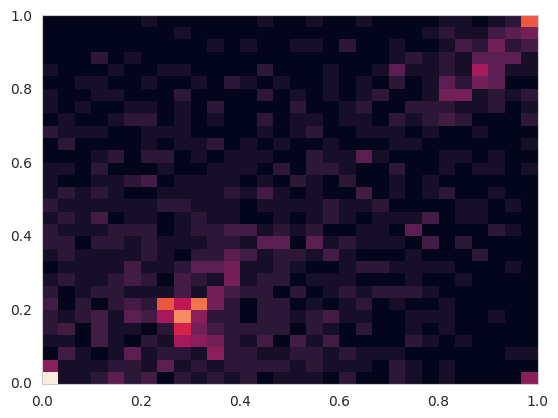

In [129]:
%matplotlib inline
_ = plt.hist2d(MC_dm.pts[:, 0], MC_dm.pts[:, 1], bins=30)

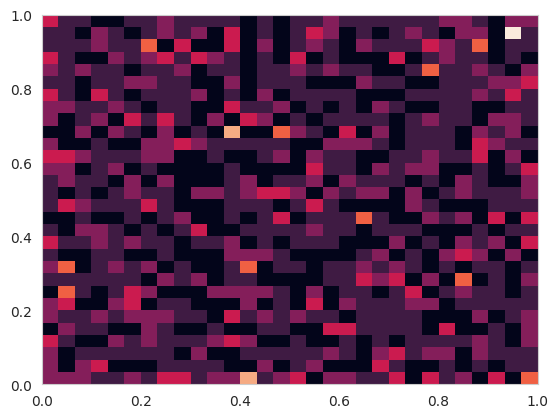

In [138]:
%matplotlib inline
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [143]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [144]:
MC.plot_ll(MC.num_steps, CM=True)

In [133]:
MC.run_pool(800000, pool_size=15, jobs_per_worker=200, plot_every=20000)

801000it [05:14, 2547.45it/s]                            


In [145]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [146]:
MC_dm.plot_ll(MC_dm.num_steps, CM=True)

In [147]:
MC_dm.g.numberOfNodes()

962

In [148]:
MC_dm.pts.shape

(962, 2)

In [127]:
MC_dm.run_pool(100000, pool_size=15, jobs_per_worker=80, plot_every=5000)

100800it [01:11, 1403.02it/s]                           


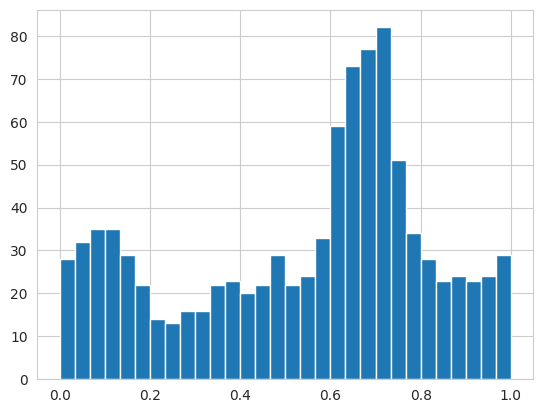

In [22]:
%matplotlib inline
_ = plt.hist(MC.pts[:, 0], bins=30)

In [78]:
fe = feature_extractor.FeatureExtractor([])
cl = fe.fit_chung_lu(g)

weights = utils.graph_degrees_to_weights(g)
c, probs_cl = generation.chung_lu_fit_c(g, weights)
chung_lu_ll = generation.g_probs_to_ll(g, probs_cl)
print(f'chunglu LL: {chung_lu_ll}')
er_ll = generation.ER_ll(g)
print(f'er LL: {er_ll}')

g_cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_cl)
print(out)
print(percent_edges_captured, percent_fake_edges_wrong)

chunglu LL: -128476.06068462232
er LL: -640802.091778406
[[  1480  36144]
 [ 36346 851474]]
0.03933659366361897 0.9608734732723524


In [26]:
MC.calculate_ll()

(-143216.9045256718, 18811.572108576074)

In [89]:
self = MC
ll = 0
expected_num_edges = 0
P = np.zeros_like(A, dtype=np.float64)
L = np.zeros_like(A, dtype=np.float64)

for u_index in range(self.n):
    eps = 1e-7
    p_u_to_vs = generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)
    p_u_to_vs *= (1 - self.failure_prob)
    ##### Mix in CL
    p_u_to_vs = 0.5*p_u_to_vs + 0.5*probs_cl[u_index]
    #####
    expected_num_edges += p_u_to_vs.sum()
    p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)
    P[:, u_index] = p_u_to_vs
    u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
    ###
    out = 0
    n = g.numberOfNodes()
    assert n == len(p_u_to_vs)
    mask = np.ones(n, dtype=bool)
    for nhb in g.iterNeighbors(u_index):
        mask[nhb] = False
        out += np.log(p_u_to_vs[nhb])
    L[~mask, u_index] = np.log(p_u_to_vs[~mask])
    mask[u_index] = False
    out += np.log(1 - p_u_to_vs[mask]).sum()
    L[mask, u_index] = np.log(1 - p_u_to_vs[mask])
    ll += u_ll

print(ll, expected_num_edges/2)

-126121.13094076623 18823.635308670997


In [84]:
g.numberOfEdges()

18812

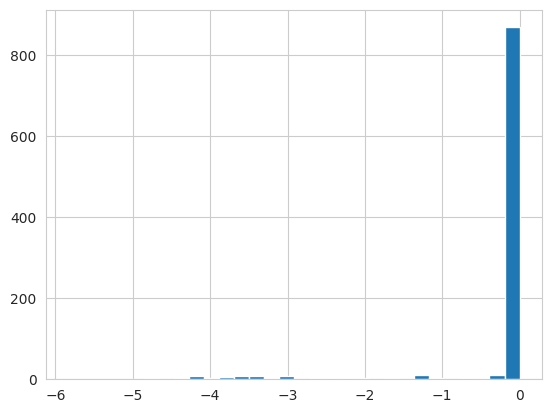

In [59]:
%matplotlib inline
_ = plt.hist(L[:, 0], bins=30)

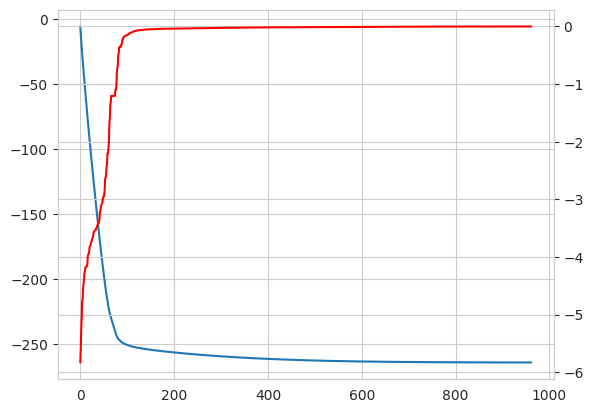

In [66]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(np.cumsum(sorted(L[:, 0])))
ax2.plot(sorted(L[:,0]), color='r')

In [67]:
mask

73

In [79]:
probs_cl.shape

(962, 962)

In [80]:
u_index = 0
eps = 1e-7
# p_u_to_vs = generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)
p_u_to_vs = probs_cl[u_index]
p_u_to_vs *= (1 - self.failure_prob)
expected_num_edges += p_u_to_vs.sum()
p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)
# P[:, u_index] = p_u_to_vs
u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
###
out = 0
n = g.numberOfNodes()
assert n == len(p_u_to_vs)
mask = np.ones(n, dtype=bool)
for nhb in g.iterNeighbors(u_index):
    mask[nhb] = False
    out += np.log(p_u_to_vs[nhb])
# L[~mask, u_index] = np.log(p_u_to_vs[~mask])
mask[u_index] = False
out += np.log(1 - p_u_to_vs[mask]).sum()
# L[mask, u_index] = np.log(1 - p_u_to_vs[mask])
# ll += u_ll

<Figure size 640x480 with 0 Axes>

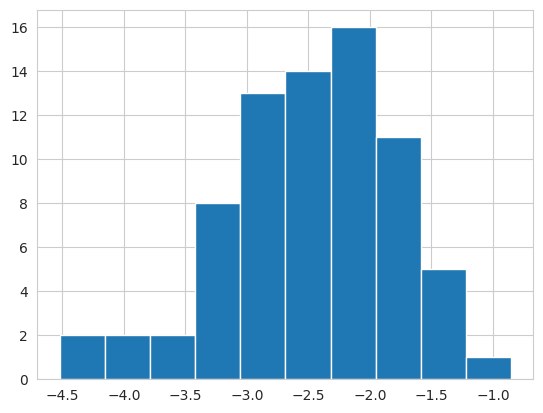

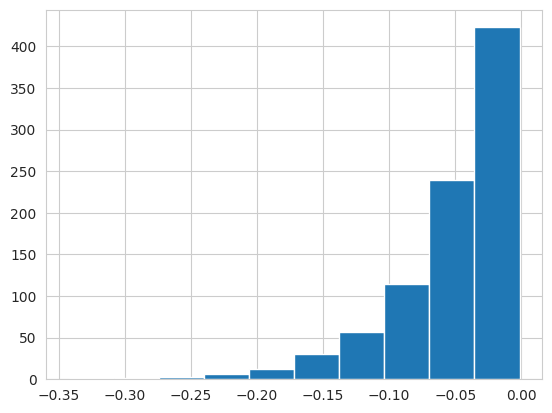

In [81]:
_ = plt.hist(np.log(p_u_to_vs[~mask]))
plt.figure()
_ = plt.hist(np.log(1 - p_u_to_vs[mask]))

<Figure size 640x480 with 0 Axes>

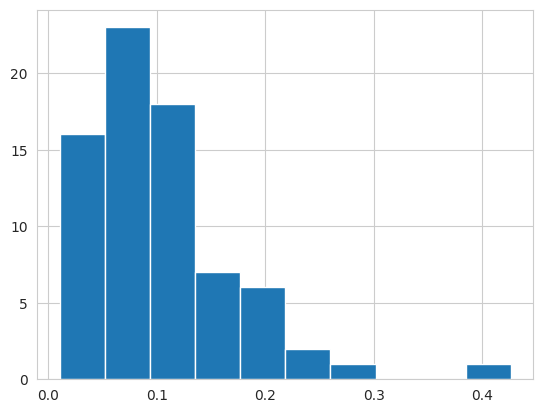

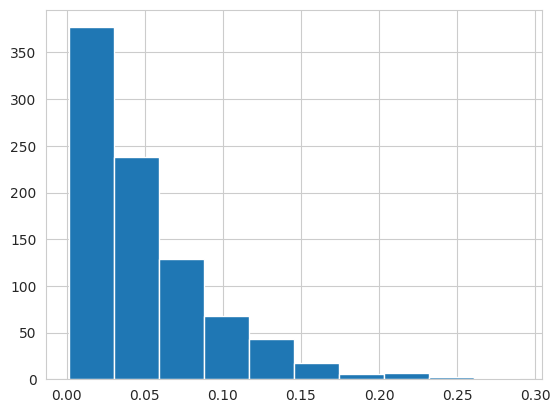

In [82]:
_ = plt.hist(p_u_to_vs[~mask])
plt.figure()
_ = plt.hist(p_u_to_vs[mask])

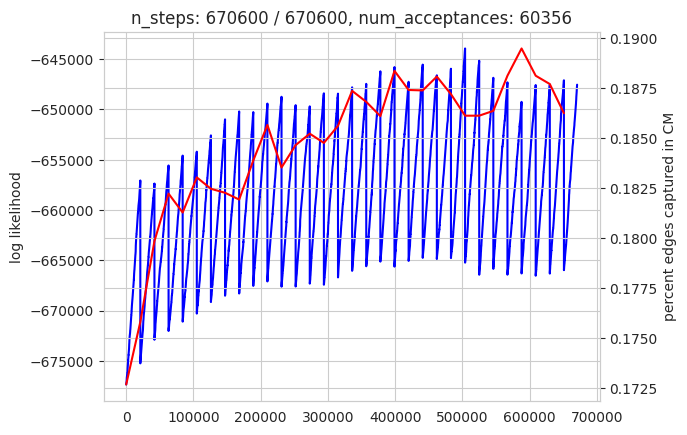

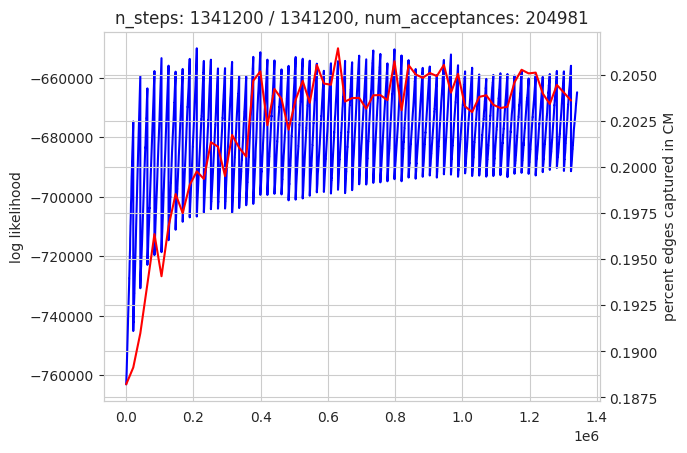

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC1.plot_ll(MC1.num_steps, CM=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC2.plot_ll(MC2.num_steps, CM=True)

In [15]:
g_degs = [g.degree(i) for i in range(g.numberOfNodes())]

argsorted = np.argsort(g_degs)[::-1]
fe = feature_extractor.FeatureExtractor([])

cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
# A_cl = A_cl[:, argsorted][argsorted, :]

out, p1, p2 = mcmc.CM(MC1.A[:, argsorted][argsorted, :], A_cl)
print(p1, p2)
print(out)

weights = utils.graph_degrees_to_weights(g)
c, probs = generation.chung_lu_fit_c(g, weights)
chung_lu_ll = generation.g_probs_to_ll(g, probs)
print(f'chunglu LL: {chung_lu_ll}')
er_ll = generation.ER_ll(g)
print(f'er LL: {er_ll}')

0.09493810057831431 0.9050671181521345
[[  17270  164638]
 [ 164648 4648669]]
chunglu LL: -670400.0038853943
er LL: -3460876.941063832


In [16]:
self = MC1
g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = self.get_CM(self.A)
print(out)
print(percent_edges_captured, percent_fake_edges_wrong)

ll, expected_num_edges = MC1.calculate_ll()
ll, expected_num_edges

../benji_girgs/generation.py:125: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:586: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:587: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


[[  34192  147716]
 [ 145568 4667749]]
0.18796314620577434 0.8097908322207388


In [20]:
ll, expected_num_edges = MC1.calculate_ll()
ll, expected_num_edges

(-666249.1723944361, 91118.34111135668)

In [25]:
ll - n * np.log(n)

-683485.4845876876